In [1]:
import pandas as pd
from collections import Counter
from itertools import combinations
import numpy as np
import ast
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import copy
import networkx as nx
import random
from uuid import uuid4
import math
from time import sleep, time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

###

#import tensorflow as tf
import torch
from torch import nn, optim

In [2]:
def set_up_game():
    begin = time()
    territories = {
        'Ankara':['Smyrna', 'Constantinople', 'Black Sea', 'Armenia'],
        'Belgium': ['English Channel', 'North Sea', 'Picardy', 'Burgundy', 'Ruhr', 'Holland'],
        'Berlin': ['Baltic Sea', 'Kiel', 'Munich', 'Silesia', 'Prussia'],
        'Brest': ['English Channel', 'Mid Atlantic Ocean', 'Picardy', 'Paris', 'Gascony'],
        'Budapest': ['Galicia', 'Vienna', 'Trieste', 'Serbia', 'Rumania'],
        'Bulgaria': ['Rumania', 'Black Sea', 'Constantinople', 'Aegean Sea', 'Greece', 'Serbia'],
        'Bulgaria_ec': ['Rumania', 'Black Sea', 'Constantinople'],
        'Bulgaria_sc': ['Greece', 'Aegean Sea', 'Constantinople'],
        'Constantinople': ['Black Sea', 'Ankara', 'Smyrna', 'Aegean Sea', 'Bulgaria', 'Bulgaria_ec', 'Bulgaria_sc'],
        'Denmark': ['Helgoland Bight', 'North Sea', 'Skagerrack', 'Sweden', 'Baltic Sea', 'Kiel'],
        'Edinburgh': ['Norwegian Sea', 'North Sea', 'Yorkshire', 'Liverpool', 'Clyde'],
        'Greece': ['Aegean Sea', 'Ionian Sea', 'Albania', 'Serbia', 'Bulgaria', 'Bulgaria_sc'],
        'Holland': ['Helgoland Bight', 'North Sea', 'Belgium', 'Ruhr', 'Kiel'],
        'Kiel': ['Ruhr', 'Holland', 'Helgoland Bight', 'Denmark', 'Baltic Sea', 'Berlin', 'Munich'],
        'Liverpool': ['Clyde', 'Edinburgh', 'Yorkshire', 'Whales', 'North Atlantic Ocean', 'Irish Sea'],
        'London': ['North Sea', 'English Channel', 'Yorkshire', 'Whales'],
        'Marseiles': ['Burgundy', 'Gascony', 'Spain', 'Spain_sc', 'Piedmont', 'Gulf of Lyon'],
        'Moscow': ['St Petersburg', 'Livonia', 'Warsaw', 'Ukraine', 'Sevastopol'],
        'Munich': ['Berlin', 'Kiel', 'Ruhr', 'Burgundy', 'Tyrolia', 'Bohemia', 'Silesia'],
        'Naples': ['Ionian Sea', 'Tyrrhenian Sea', 'Rome', 'Apulia'],
        'Norway': ['Norwegian Sea', 'Barents Sea', 'St Petersburg', 'St Petersburg_nc', 'North Sea', 'Skagerrack', 'Sweden', 'Finland'],
        'Paris': ['Picardy', 'Brest', 'Gascony', 'Burgundy'],
        'Portugal': ['Spain', 'Spain_nc', 'Spain_sc', 'Mid Atlantic Ocean'],
        'Rome': ['Tuscany', 'Venice', 'Apulia', 'Naples', 'Tyrrhenian Sea'],
        'Rumania': ['Sevastopol', 'Ukraine', 'Galicia', 'Budapest', 'Serbia', 'Bulgaria', 'Bulgaria_ec', 'Black Sea'],
        'St Petersburg': ['Moscow', 'Livonia', 'Gulf of Bothnia', 'Finland', 'Norway', 'Barents Sea'],
        'St Petersburg_nc': ['Barents Sea', 'Norway'],
        'St Petersburg_sc': ['Finland', 'Gulf of Bothnia', 'Livonia'],
        'Serbia': ['Budapest', 'Trieste', 'Albania', 'Greece', 'Bulgaria', 'Rumania'],
        'Sevastopol': ['Armenia', 'Black Sea', 'Rumania', 'Ukraine', 'Moscow'],
        'Smyrna': ['Syria', 'Eastern Mediterranean', 'Aegean Sea', 'Constantinople', 'Armenia', 'Ankara'],
        'Spain': ['Marseiles', 'Gulf of Lyon', 'Western Mediterranean', 'Mid Atlantic Ocean', 'Gascony', 'Portugal'],
        'Spain_nc': ['Mid Atlantic Ocean', 'Gascony', 'Portugal'],
        'Spain_sc': ['Portugal', 'Mid Atlantic Ocean', 'Western Mediterranean', 'Gulf of Lyon', 'Marseiles'],
        'Sweden': ['Norway', 'Finland', 'Gulf of Bothnia', 'Baltic Sea', 'Denmark', 'Skagerrack'],
        'Trieste': ['Venice', 'Tyrolia', 'Vienna', 'Budapest', 'Serbia', 'Albania', 'Adriatic Sea'],
        'Tunis': ['Ionian Sea', 'Tyrrhenian Sea', 'Western Mediterranean', 'North Africa'],
        'Venice': ['Piedmont', 'Tyrolia', 'Trieste', 'Adriatic Sea', 'Apulia', 'Rome', 'Tuscany'],
        'Vienna': ['Galicia', 'Budapest', 'Trieste', 'Tyrolia', 'Bohemia'],
        'Warsaw': ['Livonia', 'Moscow', 'Ukraine', 'Galicia', 'Silesia', 'Prussia'],
        'Clyde': ['Norwegian Sea', 'North Atlantic Ocean', 'Edinburgh', 'Liverpool'],
        'Yorkshire': ['Edinburgh', 'Liverpool', 'Whales', 'London', 'North Sea'],
        'North Atlantic Ocean': ['Norwegian Sea', 'Irish Sea', 'Mid Atlantic Ocean', 'Clyde', 'Liverpool'],
        'Mid Atlantic Ocean': ['North Atlantic Ocean', 'Irish Sea', 'English Channel', 'Western Mediterranean', 'Spain', 'Spain_nc', 'Portugal', 'Spain_sc', 'Gascony', 'Brest', 'North Africa'],
        'Norwegian Sea': ['Barents Sea', 'North Atlantic Ocean', 'North Sea', 'Clyde', 'Edinburgh', 'Norway'],
        'North Sea': ['Norwegian Sea', 'Skagerrack', 'Helgoland Bight', 'English Channel', 'Norway', 'Denmark', 'Holland', 'Belgium', 'London', 'Yorkshire', 'Edinburgh'],
        'English Channel': ['North Sea', 'Belgium', 'Picardy', 'Brest', 'Mid Atlantic Ocean', 'Irish Sea', 'Whales', 'London'],
        'Irish Sea': ['North Atlantic Ocean', 'Liverpool', 'Whales', 'English Channel', 'Mid Atlantic Ocean'],
        'Skagerrack': ['North Sea', 'Norway', 'Sweden', 'Denmark'],
        'Baltic Sea': ['Gulf of Bothnia', 'Livonia', 'Prussia', 'Berlin', 'Kiel', 'Denmark', 'Sweden'],
        'Gulf of Bothnia': ['Sweden', 'Finland', 'St Petersburg', 'St Petersburg_sc', 'Livonia', 'Baltic Sea'],
        'Barents Sea': ['Norwegian Sea', 'Norway', 'St Petersburg', 'St Petersburg_nc'],
        'Western Mediterranean': ['Mid Atlantic Ocean', 'North Africa', 'Tunis', 'Tyrrhenian Sea', 'Gulf of Lyon', 'Spain', 'Spain_sc'],
        'Gulf of Lyon': ['Marseiles', 'Piedmont', 'Tuscany', 'Tyrrhenian Sea', 'Western Mediterranean', 'Spain', 'Spain_sc'],
        'Tyrrhenian Sea': ['Ionian Sea', 'Naples', 'Rome', 'Tuscany', 'Gulf of Lyon', 'Western Mediterranean', 'Tunis'],
        'Ionian Sea': ['Tunis', 'Tyrrhenian Sea', 'Naples', 'Apulia', 'Adriatic Sea', 'Albania', 'Greece', 'Aegean Sea', 'Eastern Mediterranean'],
        'Adriatic Sea': ['Apulia', 'Venice', 'Trieste', 'Albania', 'Ionian Sea'],
        'Aegean Sea': ['Ionian Sea', 'Greece', 'Bulgaria', 'Bulgaria_sc', 'Constantinople', 'Smyrna', 'Eastern Mediterranean'],
        'Eastern Mediterranean': ['Syria', 'Smyrna', 'Aegean Sea', 'Ionian Sea'],
        'Black Sea': ['Sevastopol', 'Armenia', 'Ankara', 'Constantinople', 'Bulgaria', 'Bulgaria_ec', 'Rumania'],
        'Picardy': ['Brest', 'Paris', 'Burgundy', 'Belgium', 'English Channel'],
        'Gascony': ['Brest', 'Paris', 'Burgundy', 'Marseiles', 'Spain', 'Mid Atlantic Ocean', 'Spain_nc'],
        'Burgundy': ['Paris', 'Picardy', 'Belgium', 'Ruhr', 'Munich', 'Marseiles', 'Gascony'],
        'North Africa': ['Tunis', 'Western Mediterranean', 'Mid Atlantic Ocean'],
        'Ruhr': ['Belgium', 'Holland', 'Kiel', 'Munich', 'Burgundy'],
        'Prussia': ['Baltic Sea', 'Livonia', 'Warsaw', 'Silesia', 'Berlin'],
        'Silesia': ['Prussia', 'Warsaw', 'Galicia', 'Bohemia', 'Munich', 'Berlin'],
        'Piedmont': ['Tyrolia', 'Venice', 'Tuscany', 'Marseiles', 'Gulf of Lyon'],
        'Tuscany': ['Venice', 'Rome', 'Tyrrhenian Sea', 'Gulf of Lyon', 'Piedmont'],
        'Apulia': ['Adriatic Sea', 'Venice', 'Ionian Sea', 'Naples', 'Rome'],
        'Tyrolia': ['Munich', 'Bohemia', 'Vienna', 'Trieste', 'Venice', 'Piedmont'],
        'Galicia': ['Warsaw', 'Ukraine', 'Rumania', 'Budapest', 'Vienna', 'Bohemia', 'Silesia'],
        'Bohemia': ['Silesia', 'Galicia', 'Vienna', 'Tyrolia', 'Munich'],
        'Finland': ['Norway', 'St Petersburg', 'St Petersburg_sc', 'Gulf of Bothnia', 'Sweden'],
        'Livonia': ['Gulf of Bothnia', 'St Petersburg', 'St Petersburg_sc', 'Moscow', 'Prussia', 'Baltic Sea', 'Warsaw'],
        'Ukraine': ['Moscow', 'Sevastopol', 'Rumania', 'Galicia', 'Warsaw'],
        'Albania': ['Adriatic Sea', 'Trieste', 'Serbia', 'Greece', 'Ionian Sea'],
        'Armenia': ['Sevastopol', 'Syria', 'Smyrna', 'Ankara', 'Black Sea'],
        'Syria': ['Armenia', 'Eastern Mediterranean', 'Smyrna'],
        'Helgoland Bight': ['Denmark', 'Kiel', 'Holland', 'North Sea'],
        'Whales': ['English Channel', 'Irish Sea', 'Liverpool', 'Yorkshire', 'London']
    }
    
    sea_territories = ['North Atlantic Ocean',
    'Mid Atlantic Ocean',
    'Norwegian Sea',
    'North Sea',
    'English Channel',
    'Irish Sea',
    'Helgoland Bight',
    'Skagerrack',
    'Baltic Sea',
    'Gulf of Bothnia',
    'Barents Sea',
    'Western Mediterranean',
    'Gulf of Lyon',
    'Tyrrhenian Sea',
    'Ionian Sea',
    'Adriatic Sea',
    'Aegean Sea',
    'Eastern Mediterranean',
    'Black Sea',
    'Bulgaria_ec',
    'Bulgaria_sc',
    'St Petersburg_nc',
    'St Petersburg_sc',
    'Spain_nc',
    'Spain_sc']

    coast = ['Bulgaria_ec',
             'Bulgaria_sc',
             'St Petersburg_nc',
             'St Petersburg_sc',
             'Spain_nc',
             'Spain_sc']

    coastal = ['Syria',
               'Smyrna',
               'Constantinople',
               'Rumania',
               'Sevastopol',
               'Armenia',
               'Ankara',
               'Greece',
               'Albania',
               'Trieste',
               'Venice',
               'Apulia',
               'Naples',
               'Rome',
               'Tuscany',
               'Piedmont',
               'Marseiles',
               'Portugal',
               'North Africa',
               'Tunis',
               'Gascony',
               'Brest',
               'Picardy',
               'Belgium',
               'Holland',
               'Kiel',
               'Denmark',
               'Berlin',
               'Prussia',
               'Livonia',
               'Finland',
               'Sweden',
               'Norway',
               'Edinburgh',
               'Yorkshire',
               'London',
               'Whales',
               'Liverpool',
               'Clyde']

    sc = [
        'Ankara',
        'Belgium',
        'Berlin',
        'Brest',
        'Budapest',
        'Bulgaria',
        'Bulgaria_ec',
        'Bulgaria_sc',
        'Constantinople',
        'Denmark',
        'Edinburgh',
        'Greece',
        'Holland',
        'Kiel',
        'Liverpool',
        'London',
        'Marseiles',
        'Moscow',
        'Munich',
        'Naples',
        'Norway',
        'Paris',
        'Portugal',
        'Rome',
        'Rumania',
        'St Petersburg',
        'St Petersburg_nc',
        'St Petersburg_sc',
        'Serbia',
        'Sevastopol',
        'Smyrna',
        'Spain',
        'Spain_nc',
        'Spain_sc',
        'Sweden',
        'Trieste',
        'Tunis',
        'Venice',
        'Vienna',
        'Warsaw',
    ]

    france = [
        'Gascony',
        'Marseiles',
        'Burgundy',
        'Paris',
        'Picardy',
        'Brest'
    ]

    england = [
        'Clyde',
        'Edinburgh',
        'Yorkshire',
        'London',
        'Whales',
        'Liverpool'
    ]

    germany = [
        'Kiel',
        'Berlin',
        'Prussia',
        'Silesia',
        'Munich',
        'Ruhr'
    ]

    italy = [
        'Piedmont',
        'Venice',
        'Apulia',
        'Naples',
        'Rome',
        'Tuscany'
    ]

    russia = [
        'Finland',
        'St Petersburg',
        'St Petersburg_nc',
        'St Petersburg_sc',
        'Moscow',
        'Sevastopol',
        'Ukraine',
        'Warsaw',
        'Livonia'
    ]

    austria = [
        'Bohemia',
        'Tyrolia',
        'Galicia',
        'Vienna',
        'Budapest',
        'Trieste'
    ]

    turkey = [
        'Constantinople',
        'Smyrna',
        'Ankara',
        'Armenia',
        'Syria'
    ]
    
    for k, v in territories.items():
        territories[k] = {'connected_to': v}
        if k in sea_territories:
            territories[k]['unit_type'] = 'fleet'
        elif k in coastal:
            territories[k]['unit_type'] = 'both'
        else:
            territories[k]['unit_type'] = 'army'
        if k in coast:
            territories[k]['coast'] = True
        else:
            territories[k]['coast'] = False
        if k in sc:
            territories[k]['sc'] = True
        else:
            territories[k]['sc'] = False
        if k in france:
            territories[k]['controlled_by'] = 'france'
        elif k in italy:
            territories[k]['controlled_by'] = 'italy'
        elif k in england:
            territories[k]['controlled_by'] = 'england'
        elif k in russia:
            territories[k]['controlled_by'] = 'russia'
        elif k in germany:
            territories[k]['controlled_by'] = 'germany'
        elif k in austria:
            territories[k]['controlled_by'] = 'austria'
        elif k in turkey:
            territories[k]['controlled_by'] = 'turkey'
        else:
            territories[k]['controlled_by'] = 'neutral'
    
    coords_dict = {
    'north_africa_army' : (240, 925),
    'north_africa_fleet' : (240, 885),
    'western_mediterranean' : (320, 850),
    'tunis_army' : (450, 925),
    'tunis_fleet' : (470, 895),
    'ionian_sea' : (620, 925),
    'aegean_sea' : (780, 900),
    'eastern_mediterranean' : (880, 940),
    'syria_fleet' : (1005, 940),
    'syria_army' : (1080, 900),
    'armenia_army' : (1100, 800),
    'armenia_fleet' : (1060, 750),
    'ankara_army' : (930, 800),
    'ankara_fleet' : (930, 760),
    'smyrna_army' : (930, 860),
    'smyrna_fleet' : (900, 900),
    'constantinople_army' : (850, 825),
    'constantinople_fleet' : (830, 804),
    'tyrrhenian_sea' : (500, 830),
    'gulf_of_lyon' : (390, 760),
    'adriatic_sea' : (600, 760),
    'black_sea' : (930, 720),
    'mid_atlantic_ocean' : (100, 580),
    'north_atlantic_ocean' : (150, 200),
    'norwegian_sea' : (475, 130),
    'barents_sea' : (860, 25),
    'gulf_of_bothnia' : (680, 320),
    'baltic_sea' : (610, 435),
    'skagerrack' : (540, 345),
    'north_sea' : (430, 345),
    'helgoland_bight' : (460, 435),
    'irish_sea' : (235, 465),
    'english_channel' : (290, 520),
    'portugal_fleet' : (95, 750),
    'portugal_army' : (125, 740),
    'spain_army' : (225, 755),
    'spain_nc' : (225, 670),
    'spain_sc' : (255, 825),
    'gascony_fleet' : (290, 650),
    'gascony_army' : (320, 670),
    'brest_army' : (310, 585),
    'brest_fleet' : (260, 555),
    'picardy_fleet' : (350, 533),
    'picardy_army' : (375, 543),
    'paris' : (355, 585),
    'burgundy' : (400, 615),
    'marseiles_army' : (405, 690),
    'marseiles_fleet' : (370, 710),
    'piedmont_fleet' : (465, 705),
    'piedmont_army' : (460, 680),
    'venice_army' : (510, 695),
    'venice_fleet' : (530, 710),
    'tuscany_army' : (515, 735),
    'tuscany_fleet' : (490, 735),
    'rome_army' : (535, 770),
    'rome_fleet' : (535, 790),
    'apulia_fleet' : (590, 780),
    'apulia_army' : (600, 810),
    'naples_army' : (570, 805),
    'naples_fleet' : (590, 860),
    'greece_army' : (700, 840),
    'greece_fleet' : (700, 890),
    'bulgaria_sc' : (775, 805),
    'bulgaria_army' : (775, 755),
    'bulgaria_ec' : (815, 755),
    'rumania_fleet' : (830, 710),
    'rumania_army' : (760, 710),
    'serbia' : (690, 740),
    'albania_army' : (675, 815),
    'albania_fleet' : (660, 790),
    'trieste_army' : (620, 700),
    'trieste_fleet' : (600, 740),
    'budapest' : (690, 650),
    'galicia' : (740, 590),
    'vienna' : (615, 615),
    'tyrolia' : (570, 625),
    'bohemia' : (575, 575),
    'munich' : (500, 580),
    'silesia' : (610, 530),
    'prussia_army' : (620, 485),
    'prussia_fleet' : (640, 450),
    'berlin_fleet' : (570, 455),
    'berlin_army' : (565, 495),
    'kiel_army' : (510, 495),
    'kiel_fleet' : (490, 460),
    'ruhr' : (470, 540),
    'belgium_army' : (420, 535),
    'belgium_fleet' : (395, 505),
    'holland_fleet' : (430, 485),
    'holland_army' : (442, 505),
    'denmark_army' : (515, 405),
    'denmark_fleet' : (540, 420),
    'norway_army' : (540, 280),
    'norway_fleet' : (480, 330),
    'sweden_army' : (595, 330),
    'sweden_fleet' : (650, 310),
    'finland_fleet' : (685, 250),
    'finland_army' : (740, 250),
    'st_petersburg_army' : (890, 250),
    'st_petersburg_nc' : (845, 185),
    'st_petersburg_sc' : (800, 300),
    'moscow' : (890, 420),
    'livonia_army' : (740, 420),
    'livonia_fleet' : (730, 375),
    'warsaw' : (700, 515),
    'ukraine' : (830, 550),
    'sevastopol_army' : (960, 550),
    'sevastopol_fleet' : (960, 620),
    'edinburgh_fleet' : (375, 330),
    'edinburgh_army' : (340, 360),
    'yorkshire_army' : (355, 440),
    'yorkshire_fleet' : (360, 405),
    'london_army' : (350, 480),
    'london_fleet' : (390, 465),
    'whales_army' : (315, 455),
    'whales_fleet' : (280, 480),
    'liverpool_army' : (332, 440),
    'liverpool_fleet' : (332, 415),
    'clyde_army' : (325, 375),
    'clyde_fleet' : (335, 295)
    }
    coords_dict = {k.replace('_', ' '):v for k, v in coords_dict.items()}
    
    for k, v in territories.items():
        if v['unit_type'] == 'army':
            try:
                territories[k]['coords'] = {'army': coords_dict[k.lower()], 'fleet': np.nan}
            except KeyError:
                territories[k]['coords'] = {'army': coords_dict[k.lower()+' army'], 'fleet': np.nan}
        elif v['unit_type'] == 'both':
            territories[k]['coords'] = {'army': coords_dict[k.lower()+' army'],
                                        'fleet': coords_dict[k.lower()+' fleet']}
        else:
            if v['coast']:
                territories[k]['coords'] = {'army': np.nan, 'fleet': coords_dict[k.lower()[:-3]+' '+k[-2:]]}
            else:
                territories[k]['coords'] = {'army': np.nan, 'fleet': coords_dict[k.lower()]}
    
    G = nx.Graph()
    for k, v in territories.items():
        G.add_nodes_from([(k, v)])
    for k, v in territories.items():
        for c in v['connected_to']:
            G.add_edge(k, c)
    
    territories_df = pd.DataFrame(territories).T.reset_index()
    territories_df = territories_df.rename(columns = {'index':'country'})
    territories_df['start_control'] = territories_df['controlled_by']
    territories_df['sc_control'] = territories_df['controlled_by']
    
    convoy_pairs = []
    convoyable_countries = territories_df[(territories_df['unit_type']=='both')|(territories_df['country'].isin(['Bulgaria', 'Spain', 'St Petersburg']))]['country'].tolist()
    for c_1 in convoyable_countries:
        for c_2 in convoyable_countries:
            if c_1 != c_2:
                G_sub = nx.Graph(G.subgraph([x for x,y in G.nodes(data=True) if (x in [c_1, c_2]) or (y['unit_type'] == 'fleet' and not y['coast'])]))
                if G_sub.has_edge(c_1, c_2):
                    G_sub.remove_edge(c_1, c_2)
                if nx.has_path(G_sub, c_1, c_2):
                    convoy_pairs.append((c_1, c_2))
    
    units = {'location':['Marseiles',
                         'Brest',
                         'Paris',
                         'Edinburgh',
                         'Liverpool',
                         'London',
                         'Kiel',
                         'Berlin',
                         'Munich',
                         'Venice',
                         'Rome',
                         'Naples',
                         'Vienna', 
                         'Budapest', 
                         'Trieste',
                         'Constantinople',
                         'Ankara',
                         'Smyrna',
                         'St Petersburg_sc',
                         'Moscow',
                         'Warsaw',
                         'Sevastopol'],
             'type':['army',
                     'fleet',
                     'army',
                     'fleet',
                     'army',
                     'fleet',
                     'fleet',
                     'army',
                     'army',
                     'army',
                     'army',
                     'fleet',
                     'army',
                     'army',
                     'fleet',
                     'army',
                     'fleet',
                     'army',
                     'fleet',
                     'army',
                     'army',
                     'fleet'],
             'owner':['france',
                      'france',
                      'france',
                      'england',
                      'england',
                      'england',
                      'germany',
                      'germany',
                      'germany',
                      'italy',
                      'italy',
                      'italy',
                      'austria',
                      'austria',
                      'austria',
                      'turkey',
                      'turkey',
                      'turkey',
                      'russia',
                      'russia',
                      'russia',
                      'russia']}
    units_df = pd.DataFrame(units)
    units_df['unit_id'] = [str(uuid4()) for _ in range(units_df.shape[0])]
    calc_time_diff(begin, 'set_up_game')
    return territories, territories_df, units_df, G, convoy_pairs, convoyable_countries

In [3]:
def check_destination_valid(start, end):
    begin = time()
    out = end in territories[start]['connected_to'] or (start, end) in convoy_pairs
    calc_time_diff(begin, 'check_destination_valid')
    return out

def check_unit_type_valid(unit_type, end):
    begin = time()
    out = unit_type == territories_df.loc[territories_df['country']==end, 'unit_type'].values[0] or territories_df.loc[territories_df['country']==end, 'unit_type'].values[0] == 'both'
    calc_time_diff(begin, 'check_unit_type_valid')
    return out

In [4]:
def check_order(start, order = None, end = None, support = None, convoy = None):
    begin = time()
    if order is None:
        order = 'hold'
    if end is None:
        end = start
    
    assert start in territories.keys(), '"{}" is not a recognized country'.format(start)
    assert end in territories.keys(), '"{}" is not a recognized country'.format(end)
    assert order in ['move', 'hold', 'support', 'convoy', 'retreat', 'disband'], '"{}" is not a valid order'.format(order)
    if support is not None:
        for c in support:
            assert c in territories.keys(), '"{}" is not a recognized country, cannot support'.format(c)
    if convoy is not None:
        for c in convoy:
            assert c in territories.keys(), '"{}" is not a recognized country, cannot convoy'.format(c)
    
    try:
        unit_type = units_df.loc[units_df['location']==start, 'type'].values[0]
    except IndexError:
        raise AssertionError('no unit in {}'.format(start))
    
    if order == 'move':
        assert check_unit_type_valid(unit_type, end), 'unit in {} cannot move to {}'.format(start, end)
        assert check_destination_valid(start, end) or (territories[start]['unit_type'] == 'both' and territories[end]['unit_type'] == 'both'), '{} not connected to {}'.format(start, end)
        if unit_type == 'fleet':
            # ensure don't move from fleet/both to fleet/both if not connected by fleet/both territory
            assert len(set([t for t in territories[start]['connected_to'] if territories[t]['unit_type'] in ['fleet', 'both']])&set([t for t in territories[end]['connected_to'] if territories[t]['unit_type'] in ['fleet', 'both']])) > 0, 'cannot move fleet from {} to {}'.format(start, end)
    
    if order == 'support':
        if len(support) == 1:
            support = support * 2
        if support[0] == support[1]:
            support_move = 'hold'
        else:
            support_move = 'move'
        assert check_order(start, 'move', support[1]) and check_order(support[0], support_move, support[1])[0], 'cannot support {} or supported move is not valid'.format(support[1])
    
    if order == 'convoy':
        assert unit_type == 'fleet' and territories[start]['unit_type'] == 'fleet' and not territories[start]['coast']
        assert check_order(convoy[0], 'move', convoy[1])[0]
        
    if order == 'retreat':
#         print('got to retreat')
        if all([c in units_df['location'].tolist() for c in territories[start]['connected_to']]):
#             print('caught')
            order = 'disband'
            end = np.nan
        else:
#             print('missed')
            assert check_unit_type_valid(unit_type, end), 'unit in {} cannot move to {}'.format(start, end)
            assert check_destination_valid(start, end) or (territories[start]['unit_type'] == 'both' and territories[end]['unit_type'] == 'both'), 'unit cannot move from {} to {}'.format(start, end)
    calc_time_diff(begin, 'check_order')
    return True, (start, order, end, support, convoy)


In [5]:
def submit_move(start, order = None, end = None, support = None, convoy = None):
    begin = time()
    valid, (start, order, end, support, convoy) = check_order(start, order, end, support, convoy)
    assert valid
    calc_time_diff(begin, 'submit_move')
    return start, order, end, support, convoy

In [6]:
def cut_support(df):
    begin = time()
    df_sub = df.merge(df[df['order'] == 'move'], left_on = 'start', right_on = 'end', how = 'left')
    df.loc[(~df_sub['start_y'].isna())&(df['order']=='support'), 'order'] = 'hold'
    calc_time_diff(begin, 'cut_support')
    return df

In [7]:
def count_support(df):
#     print('counting support')
    begin = time()
    endpoints = df['end'].value_counts()
    resolve_moves = df[df['end'].isin(endpoints[endpoints > 1].index.tolist())]
    resolve_moves['count'] = 0
#     print(resolve_moves)
    for ind, sup in df['support'].items():
        if sup is not None:
            s, e = sup
            resolve_moves.loc[(resolve_moves['start']==s)&(resolve_moves['end']==e), 'count'] += 1
    calc_time_diff(begin, 'count_support')
    return resolve_moves
    ####
#     for e in endpoints.index:
# #         print(e)
#         for ind, l in df['support'].iteritems():
# #             print(l)
#             if l is not None:
#                 if e in l:
#                     print(e)
#                     print(l)
#                     resolve_moves = resolve_moves.concat(df.loc[ind])
# #         for ind, l in df['convoy'].iteritems():
# #             if l is not None:
# #                 if e in l:
# #                     resolve_moves = resolve_moves.concat(df.loc[ind])
#     print(resolve_moves)
#     support_count = pd.DataFrame(
#         Counter(
#             [i[0] for i in resolve_moves['support'].tolist() if i is not None]),
#         index = ['count']).T.reset_index()
# #     print(resolve_moves)
#     print(support_count)
#     return resolve_moves.merge(support_count, left_on = 'start', right_on = 'index')
    

In [8]:
def detect_self_loops(submitted_moves_df):
    begin = time()
    move_sub = submitted_moves_df[submitted_moves_df['order']=='move']
    if move_sub.shape[0] > 0:
        move_sub['start'] = move_sub['start'].str.split('_').str[0]
        move_sub['end'] = move_sub['end'].str.split('_').str[0]
        DG = nx.DiGraph()
        DG.add_edges_from(list(zip(move_sub['start'].tolist(), move_sub['end'].tolist())))
        calc_time_diff(begin, 'detect_self_loops')
        return list(nx.simple_cycles(DG))
    else:
        calc_time_diff(begin, 'detect_self_loops')
        return []

In [9]:
def check_successful_order(submitted_moves_df, start, end, success = None, self_loops = []):
    begin = time()
    start_coast = start.split('_')[0]
    end_coast = end.split('_')[0]
    self_loop = ([l for l in self_loops if start in l]+[[]])[0]
    if success is None:
        ## don't resolve previous moves of self loop to prevent infinite recursion ##
        if not (start_coast in self_loop and end_coast in self_loop):#any([start in l and end in l for l in self_loops]):
            ## resolve dependent moves
            if end_coast in submitted_moves_df['start'].str.split('_').str[0].tolist() and submitted_moves_df.loc[submitted_moves_df['start'].str.split('_').str[0] == end_coast, 'order'].values[0] == 'move':
                rerun_start, rerun_end, rerun_success = submitted_moves_df[submitted_moves_df['start'].str.split('_').str[0] == end_coast][['start', 'end', 'success']].iloc[0].tolist()
                submitted_moves_df = check_successful_order(submitted_moves_df, rerun_start, rerun_end, rerun_success, self_loops)
        ## check convoy moves ##
        if end not in territories_df.loc[territories_df['country'] == start, 'connected_to'].values[0]+[start]:
            convoying_fleets = submitted_moves_df.loc[(submitted_moves_df['order'] == 'convoy')&(submitted_moves_df['convoy'].str[0]==start)&(submitted_moves_df['convoy'].str[1]==end), 'start'].tolist()
            for f in convoying_fleets:
                rerun_start, rerun_end, rerun_success = submitted_moves_df[submitted_moves_df['start'] == f][['start', 'end', 'success']].iloc[0].tolist()
                submitted_moves_df = check_successful_order(submitted_moves_df, rerun_start, rerun_end, rerun_success, self_loops)
            convoying_fleets = submitted_moves_df[(submitted_moves_df['start'].isin(convoying_fleets))&(submitted_moves_df['success'])]['start'].tolist()
            G_sub = nx.Graph(G.subgraph(convoying_fleets+[start, end]))
            if G_sub.has_edge(start, end):
                G_sub.remove_edge(c_1, c_2)
            if not nx.has_path(G_sub, start, end):
                submitted_moves_df.loc[submitted_moves_df['start'] == start, ['success', 'order', 'end', 'count']] = [False, 'hold', start, 0]
                submitted_moves_df = check_successful_order(submitted_moves_df, start, start, False, self_loops)
        ## check support moves valid ##
        if submitted_moves_df.loc[submitted_moves_df['start'] == start, 'order'].values[0] == 'support':
            support_start, support_end = submitted_moves_df.loc[submitted_moves_df['start'] == start, 'support'].values[0]
            support_df = submitted_moves_df[(submitted_moves_df['start']==support_start)&(submitted_moves_df['end']==support_end)]
            if support_df.shape[0] == 0:
                submitted_moves_df.loc[submitted_moves_df['start'] == start, ['success', 'order', 'count']] = [False, 'hold', 0]
                submitted_moves_df = check_successful_order(submitted_moves_df, start, start, False, self_loops)
#             elif support_df.shape[0] == 1:
#                 submitted_moves_df.loc[submitted_moves_df['start'] == start, 'success'] = True
            elif support_df.shape[0] > 1:
                raise IndexError('Same move multiple times, {} supporting both moves'.format(start))
        ## Can't dislodge self ##
        if end_coast in units_df['location'].str.split('_').str[0].tolist() and \
            units_df.loc[units_df['location'].str.split('_').str[0] == end_coast, 'owner'].values[0] == units_df.loc[units_df['location'].str.split('_').str[0] == start_coast, 'owner'].values[0] and \
            end != start \
            and not submitted_moves_df.loc[submitted_moves_df['start'].str.split('_').str[0] == end_coast, 'success'].values[0]:
            try:
#                        submitted_moves_df[(submitted_moves_df['start'].str.split('_').str[0]==end_coast)&(submitted_moves_df['end'].str.split('_').str[0]==start_coast)].shape[0]==1
                assert submitted_moves_df.loc[submitted_moves_df['start'].str.split('_').str[0] == end_coast, 'order'].values[0] != 'move' or \
                       (start_coast in self_loop and end_coast in self_loop and submitted_moves_df.loc[submitted_moves_df['start'].str.split('_').str[0]==end_coast, 'end'].values[0].split('_')[0] in self_loop)
            except AssertionError as e:
                print(start_coast)
                print(end_coast)
                print(submitted_moves_df.loc[submitted_moves_df['start'].str.split('_').str[0] == end_coast])
                print(self_loop)
                raise AssertionError(e)
#                    (start == submitted_moves_df.loc[submitted_moves_df['start'] == end, 'end'].values[0] and \
#                     end == submitted_moves_df.loc[submitted_moves_df['end'] == start, 'start'].values[0])
#             success = False
            submitted_moves_df.loc[submitted_moves_df['start'] == start, ['success', 'order', 'end', 'count']] = [False, 'hold', start, 0]
#             submitted_moves_df.loc[submitted_moves_df['start'] == start, 'order'] = 'hold'
#             submitted_moves_df.loc[submitted_moves_df['start'] == row['start'], 'end'] = row['start']
#             submitted_moves_df.loc[submitted_moves_df['start'] == row['start'], 'count'] = 0
            submitted_moves_df = check_successful_order(submitted_moves_df, start, start, False, self_loops)
        else:
            resolve_moves = submitted_moves_df[(submitted_moves_df['end'].isin([end, end_coast, end_coast+'_sc', end_coast+'_nc', end_coast+'_ec']))|\
                                               (submitted_moves_df['start'].str.split('_').str[0].isin(self_loop))]
            rest = submitted_moves_df.drop(resolve_moves.index)
            not_moving = resolve_moves[resolve_moves['order']!='move']
            if not_moving.shape[0]>0:
                hold_owner = units_df[units_df['location']==not_moving['start'].values[0]]['owner'].values[0]
                m=(resolve_moves['order']=='move')&\
                  (resolve_moves['start'].isin(units_df[units_df['owner']==hold_owner]['location'].tolist()))
#                 if sum(m.tolist()) > 0:
                resolve_moves.loc[m,'success']=False
#             resolve_moves.loc[resolve_moves['order'] == 'hold', 'count'] += 1
#             len(resolve_moves) > 0 and 
            if resolve_moves.shape[0] > 0 and resolve_moves['count'].value_counts().sort_index(ascending=False).tolist()[0]==1:
#             resolve_moves['count'].idxmax() == resolve_moves['count'].iloc[::-1].idxmax():
                maximum = resolve_moves['count'].max()
                top_count = maximum
            else:
                maximum = -1
                top_count = resolve_moves['count'].max()
            for ind, row in resolve_moves.iterrows():
                if row['success'] is None:
                    if row['count'] == maximum and resolve_moves[(resolve_moves['start']==row['end'])&(resolve_moves['owner']==row['owner'])].shape[0] == 0:
                        # catch edge case with self-loop and supported move into country with same owner ^^
                        success = True
                    elif row['order'] == 'convoy' and row['count'] == top_count:
                        success = True
                    else:
                        success = False
                    resolve_moves.loc[resolve_moves['start'] == row['start'], 'success'] = success
                else:
                    success = row['success']
                if not success:
                    resolve_moves.loc[resolve_moves['start'] == row['start'], 'order'] = 'hold'
                    resolve_moves.loc[resolve_moves['start'] == row['start'], 'end'] = row['start']
                    resolve_moves.loc[resolve_moves['start'] == row['start'], 'count'] = 0
                    submitted_moves_rerun = check_successful_order(pd.concat([rest, resolve_moves]).sort_index(), row['start'], row['start'], success, self_loops)
                    try:
                        resolve_moves.loc[resolve_moves['start'] == row['start']] = submitted_moves_rerun[submitted_moves_rerun['start'] == row['start']].values
                    except ValueError as e:
                        resolve_moves.loc[resolve_moves['start'] == row['start']] = submitted_moves_rerun[submitted_moves_rerun['start'] == row['start']].values[0]
                        # print(row)
                        # print('***___***___***')
                        # print(submitted_moves_rerun)
                        # print('***___***___***')
                        # print(resolve_moves)
                        # raise e
            submitted_moves_df = pd.concat([rest, resolve_moves]).sort_index()
    elif not success:
        resolve_moves = submitted_moves_df[submitted_moves_df['end'].isin([end, end_coast])]
        rest = submitted_moves_df.drop(resolve_moves.index)
        resolve_moves_diff_owner = resolve_moves[(resolve_moves['start']==start)|(resolve_moves['owner']!=resolve_moves.loc[resolve_moves['start']==start, 'owner'].values[0])] #remove same owners since can't dislodge self
#         resolve_moves.loc[resolve_moves['order'] == 'hold', 'count'] += 1
#         if len(resolve_moves) > 0:
        maximum = resolve_moves_diff_owner['count'].max()
#         else:
#             maximum = -1
        if resolve_moves_diff_owner.loc[resolve_moves_diff_owner['start'] == start, 'count'].values[0] != maximum:
            resolve_moves.loc[resolve_moves['start'] == start, 'dislodged'] = True
            resolve_moves.loc[resolve_moves['start'] == start, 'order'] = 'retreat'
        else:
            resolve_moves.loc[resolve_moves['start'] == start, 'dislodged'] = False
        submitted_moves_df = pd.concat([rest, resolve_moves]).sort_index()
    calc_time_diff(begin, 'check_successful_order')
    return submitted_moves_df
    
    
    

In [10]:
def make_submitted_moves_df(orders_list):
    begin = time()
    submitted_moves = {'start': [], 'order': [], 'end': [], 'support': [], 'convoy': []}
    for move in orders_list:
        if len(move) == 3:
            if move[1] in ['move', 'retreat', 'hold']:
                start, order, end, support, convoy = submit_move(move[0], move[1], move[2])
            elif move[1] == 'support':
                start, order, end, support, convoy = submit_move(move[0], move[1], support = move[2])
            elif move[1] == 'convoy':
                start, order, end, support, convoy = submit_move(move[0], move[1], convoy = move[2])
            elif move[1] == 'disband':
                start, order, end, support, convoy = *move, None, None
        elif len(move) == 2:
            start, order, end, support, convoy = submit_move(move[0], move[1])
        else:
            start, order, end, support, convoy = submit_move(move[0])
#         print(move, 'is valid')
        try:
            submitted_moves['start'].append(start)
            submitted_moves['order'].append(order)
            submitted_moves['end'].append(end)
            submitted_moves['support'].append(support)
            submitted_moves['convoy'].append(convoy)
        except UnboundLocalError:
            print(move)
            print(orders_list)
#     print(submitted_moves)
    calc_time_diff(begin, 'make_submitted_moves_df')
    return pd.DataFrame(submitted_moves)

In [11]:
def resolve_submitted_moves(orders_list):
    begin = time()
    original_orders = make_submitted_moves_df(orders_list)
    original_orders = original_orders.merge(units_df, how = 'left', left_on = 'start', right_on = 'location').drop('location', axis = 1)
    submitted_moves_df = copy.deepcopy(original_orders)
#     print(submitted_moves_df)
    support_count = count_support(submitted_moves_df)
#     print('support_count')
#     print(support_count)
    submitted_moves_df = submitted_moves_df.merge(support_count[['start', 'count']], on = 'start', how = 'left')# right_on = 'index' .drop('index', axis = 1)
    submitted_moves_df['count'].fillna(0)
#     print('submitted_moves_df')
#     print(submitted_moves_df)
    submitted_moves_df['count'] = submitted_moves_df['count'].fillna(0)
    submitted_moves_df['success'] = None
    submitted_moves_df['dislodged'] = False
    self_loops = detect_self_loops(submitted_moves_df)
    submitted_moves_df = submitted_moves_df.sort_values('order', ascending = False).reset_index(drop=True) #ensure look at support first
#     print(submitted_moves_df)
    for ind in range(len(submitted_moves_df)):
        row = submitted_moves_df.loc[ind]
        if row['success'] is None:
            start, end, success = row[['start', 'end', 'success']]
#             print('**STARTING**')
#             print(start, end, success)
            submitted_moves_df = check_successful_order(submitted_moves_df, start, end, success, self_loops)
#             print(submitted_moves_df)
    calc_time_diff(begin, 'resolve_submitted_moves')
    return submitted_moves_df, original_orders

In [12]:
def render_map():
    x = []
    y = []
    for l, t in zip(units_df['location'], units_df['type']):
        c = territories_df.loc[territories_df['country'] == l, 'coords'].values[0][t]
        x.append(c[0])
        y.append(c[1])
    
    x, y = np.atleast_1d(x, y)
    
    fig, ax = plt.subplots(figsize = (22.7, 19.51))

    dip_map = plt.imread('map_assets/diplomacy_map.gif')
    dip_im = OffsetImage(dip_map, zoom = 1)
    dip_ab = AnnotationBbox(dip_im, (0, 0), xycoords = 'data', frameon = False, box_alignment = (0, 0))
    ax.add_artist(dip_ab)
#     fleet_icon = plt.imread('personal/fleet_icon.png')
    fleet_icon_dict = {c: OffsetImage(plt.imread('map_assets/fleet_{}.png'.format(c)), zoom = 1) for c in units_df['owner'].unique()}
    army_icon_dict = {c: OffsetImage(plt.imread('map_assets/army_{}.png'.format(c)), zoom = 1) for c in units_df['owner'].unique()}
#     fleet_im = OffsetImage(fleet_icon, zoom = 1)
#     army_icon = plt.imread('personal/army_icon.png')
#     army_im = OffsetImage(army_icon, zoom = 1)
    for _, row in units_df.iterrows():
        x0, y0 = territories[row['location']]['coords'][row['type']]
        if row['type'] == 'army':
            ab = AnnotationBbox(army_icon_dict[row['owner']], (x0, 965-y0), xycoords = 'data', frameon = False)
        else:
            ab = AnnotationBbox(fleet_icon_dict[row['owner']], (x0, 965-y0), xycoords = 'data', frameon = False)
        ax.add_artist(ab)
    ax.update_datalim(np.column_stack([[0, 1152], [0, 965]]))
    ax.autoscale()
    plt.axis('off')
    plt.show();

In [13]:
def update_territories_df(territories_df, units_df, season):
    begin = time()
#     print('updating territories_df')
    old_territories_df = copy.deepcopy(territories_df)
    for ind, row in units_df.iterrows():
#         print(ind, row)
        territories_df.loc[territories_df['country'].str.split('_').str[0]==row['location'].split('_')[0], 'controlled_by'] = row['owner']
#         print(territories_df[territories_df['country']==row['location']])
#     print(territories_df[territories_df['country']=='Spain'])
    if season == 'fall':
        for r in units_df.itertuples(index=None, name=None):
            territories_df.loc[territories_df['country']==r[0], 'sc_control'] = r[2]
    calc_time_diff(begin, 'update_territories_df')
    return old_territories_df, territories_df

In [14]:
## DEPRECATED
# def prepare_reward_datasets(old_territories_df, territories_df, units_df, original_orders, resolved_orders):
#     print("THIS FUNCTION IS DEPRECATED, YOU SHOULDN'T BE USING IT.")
#     original_owners = resolved_orders[['start', 'end']].merge(old_territories_df[['country', 'controlled_by']], how = 'left', left_on = 'start', right_on = 'country')[['start', 'end', 'controlled_by']]
#     original_owners = original_owners.merge(units_df[['location', 'owner', 'unit_id']], how = 'left', left_on = 'end', right_on = 'location')
#     original_orders['success'] = np.nan
#     original_orders_success = original_orders.merge(resolved_orders.drop('dislodged', axis = 1), how = 'outer').sort_values(['start', 'success']).drop_duplicates(['start', 'order', 'end'], keep = 'first').drop_duplicates('start', keep = 'last').drop(['order', 'end', 'support', 'convoy', 'count'], axis = 1).fillna(False)
#     return old_territories_df, territories_df, original_orders_success, original_owners

two parts of awarding rewards: Was the goal achieved and what was the cost. for the first, if didn't control territory do you now control it or are you closer to it. If you did control it, do you still control it. for the second, how much ground did you lose, ie, how many territories did you lose control of/gain control of (other than target territory) and are opponents closer to your supply centers (greater importance for home supply centers). These rewards should be evaluated on a per unit basis since that is how the predictions will be run.

mean distance of allied vs unallied units from target
gained/held/lost target

all territories that lost (excluding target), normed by distance from target
mean distance of unallied from SCs, normed by SC distance from target (include target in this calc if applicable)

In [15]:
#work on cleaning up arguments
def calc_order_reward(owner, target): #order, success, dislodged, end, season
    begin = time()
    target_control_reward = (territories_df[(territories_df['country']==target)&(territories_df['controlled_by']==owner)].shape[0] - old_territories_df[(old_territories_df['country']==target)&(old_territories_df['controlled_by']==owner)].shape[0])*2+1
    #2 and 1 are just arbitrary numbers here, can modify

    allied = units_df.loc[units_df['owner'].isin(allies[owner]), 'location'].values
    non_allied = units_df.loc[~units_df['owner'].isin(allies[owner]), 'location'].values
    allied_mean_dist = np.mean([nx.shortest_path_length(G, target, r) for r in allied])
    non_allied_mean_dist = np.mean([nx.shortest_path_length(G, target, r) for r in non_allied])
    mean_dist_ratio_reward = non_allied_mean_dist/allied_mean_dist

    lost_territories = units_df.loc[(units_df['location'].isin(old_territories_df.loc[old_territories_df['controlled_by']==owner, 'country'].values))&\
             (units_df['location'].isin(territories_df.loc[territories_df['controlled_by']!=owner, 'country'].values))&\
             (units_df['location']!=target), 'location'].values
    lost_territories_reward = -1*sum([10/nx.shortest_path_length(G, target, r) for r in lost_territories]) #10 is just an arbitrary number here, can modify

    controlled_scs = territories_df.loc[(territories_df['sc'])&(territories_df['sc_control']==owner), 'country'].values
    if len(controlled_scs) == 0:
        mean_sc_dist_ratio_reward = 0
    else:
        unallied_start, unallied_end = list(zip(*resolved_orders.loc[~resolved_orders['owner'].isin(allies[owner]), ['start', 'end']].values))
        unallied_mean_dist_start = np.mean([nx.shortest_path_length(G, l, r) for r in unallied_start for l in controlled_scs])
        unallied_mean_dist_end = np.mean([nx.shortest_path_length(G, l, r) for r in unallied_end for l in controlled_scs])
        mean_sc_dist_ratio_reward = unallied_mean_dist_end/unallied_mean_dist_start
    calc_time_diff(begin, 'calc_order_reward')
    return sum([target_control_reward, mean_dist_ratio_reward, lost_territories_reward, mean_sc_dist_ratio_reward])

In [16]:
##DEPRICATED!##
# def calc_reward(start, end, moves, units, country, season):
#     print("THIS FUNCTION IS DEPRECATED, YOU SHOULDN'T BE USING IT, SWITCH TO `calc_order_reward`")
#     if season == 'fall':
#         sc_reward = (sum(end[end['controlled_by'] == country]['sc']) - sum(start[start['controlled_by'] == country]['sc']))*100
#     else:
#         sc_reward = 0
# #     sc_reward = (sum(end[end['controlled_by'] == country]['sc']) - sum(start[start['controlled_by'] == country]['sc']))*100
#     units_sub = units[units['controlled_by'] == country]
#     units_reward = (units_sub[units_sub['controlled_by'] == units_sub['owner']].shape[0] - units_sub.shape[0])*2
#     merged_units_df = start.merge(moves, how = 'inner', left_on = 'country', right_on = 'start')
#     sub = merged_units_df[merged_units_df['controlled_by']==country]
#     move_reward = sum(sub['success']) - (sub.shape[0] - sum(sub['success']))
#     return sum([sc_reward, units_reward, move_reward])

##DEPRICATED!##
#how apply negative reward to losing a sc? For now just ignore
# def calc_order_reward(order, success, dislodged, end, owner, season, target):
#     unit_reward, sc_reward = 0, 0
#     if row['order'] == 'disband':
#         unit_reward = -1#-5
#     if row['dislodged']:
#         unit_reward = -1#-3
#     if row['success']:
#         move_reward = 1
#     else:
#         move_reward = -1
#     if season == 'fall':
#         if territories_df.loc[territories_df['country']==row['end'], 'sc_control'].values[0] == owner and \
#            old_territories_df.loc[old_territories_df['country']==row['end'], 'sc_control'].values[0] != owner:
#             # double if starting sc (better if gain back home sc, worse if lose home sc)
#             sc_reward = 10 + 10*int(territories_df.loc[territories_df['country']==row['end'], 'start_control'].values[0] == owner)
#             int(territories_df.loc[territories_df['country']==row['end'], 'start_control'].values[0] == owner)*2
#         elif territories_df.loc[territories_df['country']==row['end'], 'sc_control'].values[0] != owner and \
#              old_territories_df.loc[old_territories_df['country']==row['end'], 'sc_control'].values[0] == owner:
#             sc_reward = -10 - 10*int(old_territories_df.loc[old_territories_df['country']==row['end'], 'start_control'].values[0] == owner)
#     return sum([move_reward, unit_reward, sc_reward])

def calc_unit_performance_reward(units_df, c, unit_id, unit_rewards):
    begin = time()
    mean_unit_rewards = np.mean([d[unit_id]['reward'] for d in unit_rewards])
    owner_unit_ids = units_df.loc[units_df['owner']==c, 'unit_id'].tolist()
    mean_owner_rewards = np.mean([d[o_id]['reward'] for d in unit_rewards for o_id in owner_unit_ids])
    calc_time_diff(begin, 'calc_unit_performance_reward')
    return mean_owner_rewards - mean_unit_rewards

def calc_owner_disband_unit_reward(total_build_rewards_grads):
    begin = time()
#     print(total_build_rewards_grads)
    # subtract mean unit reward after and before disband for each country
    pre_dict = {c:[] for c in ['france','italy','england','russia','germany','austria','turkey']}
    post_dict = {c:[] for c in ['france','italy','england','russia','germany','austria','turkey']}
    for d in total_build_rewards_grads[:2]:
#         print(d)
        for k, v in d.items():
            pre_dict[v['owner']].append(v['reward'])
    for d in total_build_rewards_grads[2:]:
        for k, v in d.items():
            post_dict[v['owner']].append(v['reward'])
#     for m in [d for l in total_build_rewards_grads[:2] for d in l]:
#         pre_dict[m['owner']].append(m['reward'])
#     for m in [d for l in total_build_rewards_grads[2:] for d in l]:
#         post_dict[m['owner']].append(m['reward'])
    calc_time_diff(begin, 'calc_owner_disband_unit_reward')
    return {c: np.mean(post_dict[c])-np.mean(pre_dict[c]) for c in ['france','italy','england','russia','germany','austria','turkey']}

In [17]:
# For disband rewards, want to reward for disbanding the worst unit.
# Maybe something where the average reward per unit per country is calculated before and after disband
# and the reward is the delta, where higher average reward is higher reward for disband
# and lower average reward is lower reward for disband.
# Also maybe implement an owner level reward where its something like total number of scs gained
# where staying neutral is still a positive reward and gaining more is greater and losing any is negative reward
# ^^ Above 2 will make unit level disband rewards difficult if 2 disbands happen simultaneously.
# I think using both is important and measures different components of the game.
# Also just look at average reward for units over last 2 turns and subtract from mean

# reward for build could be reward for new unit and/or change in average reward per unit, and/or number of scs gained

def make_builds(units_df, policy = None, human = False, model = None, unit_rewards = None, active_country=None, naive_builds_policy=None):
    begin = time()
#     builds_output_dict = {c:{} for c in ['france','italy','england','russia','germany','austria','turkey']}
    builds_output_dict = {}
    for c in ['france','italy','england','russia','germany','austria','turkey']:
        if naive_builds_policy is not None and c!=active_country:
            policy = naive_builds_policy
        else:
            policy = policy
#         print(c)
#         c_sub = [b for b in builds if b[2]==c]
#         print(units_df['owner']==c)
#         print(territories_df['controlled_by']==c)
#         print(territories_df[(territories_df['controlled_by']==c)&(territories_df['sc']==True)&(territories_df['coast']==False)])
        num_builds = sum((territories_df['sc_control']==c)&(territories_df['sc']==True)&(territories_df['coast']==False)) - sum(units_df['owner']==c)
#         print(c, ':', num_builds)
        if num_builds > 0:
            if human:
                b = input('Enter builds [(location, unit type)]: ')
                b = ast.literal_eval(b)
                for l, ut in b:
                    assert l in territories_df[(territories_df['start_control']==c)&(territories_df['sc'])]['country'].tolist(), 'cannot build in {}, not a starting supply center for {}'.format(l, c)
                    assert l not in units_df['location'], 'cannot build in {}, territory is already occupied'.format(l)
                    assert l in territories_df[territories_df['controlled_by']==c]['country'], "cannot build in {}, no longer under {}'s control".format(l, c)
                    build_country_ut = territories_df.loc[territories_df['country']==l, 'unit_type'].values[0]
                    assert ut == build_country_ut or build_country_ut == 'both', 'cannot build a {} in {}, choose the other unit type'.format(ut, c)
                b = [(a[0], a[1], c, str(uuid4())) for a in b]
                units_df = pd.concat([units_df, pd.DataFrame(b, columns = units_df.columns)], ignore_index=True)
            else:
#                 army_probs = []
#                 build_disband_rewards = []
#                 grads_list = []
                for build in range(num_builds, 0, -1):
#                     build_rewards_dict = {k:np.nan for k in ['build_disband_rewards', 'unit_performance_rewards', 'unit_reward', 'sc_reward']}
#                     build_rewards_list = []
                    build_policy_out = policy(num_builds, c, model, units_df)
                    try:
                        build_loc, army_proba, grads = build_policy_out
                    except ValueError:
                        build_loc, army_proba, grads = build_policy_out, np.nan, np.nan
#                     b.append(build_loc)
#                     army_probs.append(army_proba)
#                     build_rewards_dict['build_disband_rewards'] = build_disband_reward
#                     build_rewards_list.append(build_disband_reward)
#                     build_disband_rewards.append(build_disband_reward)
#                     grads_list.append(grads)
                    if build_loc[0] is not None:
                        build_loc = (build_loc[0], build_loc[1], c, str(uuid4()))
                        builds_output_dict[build_loc[3]] = {'rewards': [], 'grads': grads, 'owner': c}
                        units_df = pd.concat([units_df, pd.DataFrame([build_loc], columns = units_df.columns)], ignore_index=True)
#             territories_df.loc[territories_df['country'].isin(list(zip(*b))[0]), 'sc_control'] = c
        if num_builds < 0:
            if human:
                b = input('Enter units to disband (list of countries): ')
                units_df = units_df[~units_df['location'].isin(b)]
            else:
#                 army_probs = []
#                 build_disband_rewards = []
#                 grads_list = []
#                 unit_performance_rewards = []
                for disband in range(num_builds, 0, 1):
#                     build_rewards_dict = {k:np.nan for k in ['build_disband_rewards', 'unit_performance_rewards', 'unit_reward', 'sc_reward']}
                    build_rewards_list = []
                    disband_policy_out = policy(num_builds, c, model, units_df)
#                     print(disband_policy_out)
                    try:
                        disband_loc, army_proba, grads = disband_policy_out
                    except ValueError:
                        print(disband_policy_out)
                        disband_loc, army_proba, grads = (disband_policy_out, np.nan), np.nan, np.nan
#                     army_probs.append(army_proba)
#                     build_rewards_dict['build_disband_rewards'] = build_disband_reward
#                     build_rewards_list.append(build_disband_reward)
#                     build_disband_rewards.append(build_disband_reward)
#                     grads_list.append(grads)
                    try:
                        unit_id = units_df.loc[units_df['location'] == disband_loc[0], 'unit_id'].values[0]
                    except IndexError as e:
                        print(units_df)
                        print(disband_loc)
                        raise e
#                     build_rewards_dict['unit_performance_rewards'] = calc_unit_performance_reward(units_df, c, unit_id, unit_rewards)
                    build_rewards_list.append(calc_unit_performance_reward(units_df, c, unit_id, unit_rewards))
                    builds_output_dict[unit_id] = {'rewards': build_rewards_list, 'grads': grads, 'owner': c}
                    units_df = units_df[~(units_df['location']==disband_loc[0])]
    calc_time_diff(begin, 'make_builds')
    return units_df.reset_index(drop=True), builds_output_dict

In [18]:
#DEPRCATED
# def get_action(out_probs):
#     print("THIS FUNCTION IS DEPRECATED! YOU SHOULDN'T BE USING IT")
#     total_prob = 0
#     rand_prob = np.random.rand()#tf.random.uniform([1, 1])
# #     print('prob:', rand_prob)
#     for i, p in enumerate(out_probs[0]):
#         total_prob += p
#         if rand_prob <= total_prob:
#             return i

In [19]:
# def normalize_input_array(arr):
#     return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def make_model_input_arrays(owner, units_df, move=False, unit=None, num_builds=0):
    begin = time()
    out_sub = territories_df['country'].to_frame().merge(units_df, how = 'left', left_on = 'country', right_on = 'location')[['country', 'owner', 'type', 'unit_id']].fillna('unoccupied')
    allies_array = ((out_sub['owner']==owner)&(out_sub['country']!=unit)).astype(int).tolist()
    enemies_array = (~(out_sub['owner'].isin([owner, 'unoccupied']))).astype(int).tolist()
    open_array = (out_sub['owner']=='unoccupied').astype(int).tolist()
    combined_array = [1 if a == 1 else 0 if o == 1 else -1 if e == 1 else 1 for a, e, o in zip(allies_array, enemies_array, open_array)]
#     unit_type_array = (out_sub['type']=='army').astype(int).tolist()
    unit_type_array = [1 if t == 'army' else -1 if t == 'fleet' else 0 for t in (out_sub['type']).tolist()]
    if move:
        active_unit_array = (out_sub['country']==unit).astype(int).tolist()
#         return active_unit_array, allies_array, enemies_array, open_array, unit_type_array
        calc_time_diff(begin, 'make_model_input_arrays')
        return active_unit_array, combined_array, unit_type_array
    else:
        if num_builds > 0:
            possible_choices = territories_df.loc[(territories_df['start_control']==owner)&\
                                                  (territories_df['controlled_by']==owner)&\
                                                  (territories_df['sc'])&\
                                                  (~territories_df['country'].str.split('_').str[0].isin(units_df['location'].str.split('_').str[0])),
                                                  'country'].tolist()
            build_disband_choices = out_sub['country'].isin(possible_choices).astype(int).tolist()
        elif num_builds < 0:
            build_disband_choices = allies_array
        else:
            build_disband_choices = [0]*out_sub.shape[0]
#         return build_disband_choices, allies_array, enemies_array, open_array, unit_type_array
        calc_time_diff(begin, 'make_model_input_arrays')
        return build_disband_choices, combined_array, unit_type_array

In [20]:
def test_naive_policy(possible_orders_list, unit, owner, model, units_df):
    begin = time()
    if len(possible_orders_list) > 0:
        calc_time_diff(begin, 'test_naive_policy')
        return random.choice(possible_orders_list)
    else:
        calc_time_diff(begin, 'test_naive_policy')
        return (unit, 'disband', unit)

# def test_policy(target_territories_list, unit, owner, model, units_df):
#     active_unit_array, combined_array, unit_type_array = make_model_input_arrays(owner, units_df, move=True, unit=unit)
#     with tf.GradientTape() as tape:
#         try:
#             out_probs = model(np.array([active_unit_array, combined_array, unit_type_array])[np.newaxis])
#         except ValueError as e:
#             print(np.array([active_unit_array, combined_array, unit_type_array])[np.newaxis])
#             raise e
#         total_prob = 0
#         rand_prob = tf.random.uniform([1, 1])-.0001#make sure not exactly 1
#         tf_out_probs = tf.constant(out_probs)
#         for i in range(tf_out_probs.shape[1]-1, -1, -1):
#             tf_out_probs = tf.tensor_scatter_nd_update(tf_out_probs, tf.constant([[0, i]]), tf.math.reduce_sum(tf_out_probs[0, :i+1])[np.newaxis])
#         lower_tensor = tf.math.greater(tf_out_probs[0,1:], rand_prob)
#         upper_tensor = tf.math.less(tf_out_probs[0,:-1], rand_prob)
#         in_range = tf.logical_and(lower_tensor, upper_tensor)
#         try:
#             action = tf.constant(tf.where(in_range).numpy()[0, 1]+1, dtype=tf.float32)
#         except IndexError:
#             action = tf.constant(0, dtype=tf.float32)
#         y_target = tf.constant(tf.cast([action == np.array(list(range(0, len(out_probs[0]))))], tf.float32)) #[0, 1, 2, 3]
#         loss = tf.reduce_mean(loss_fn(y_target, out_probs))
#     grads = tape.gradient(loss, model.trainable_variables)
#     target_territory = target_territories_list[int(action.numpy())]
#     return target_territory, out_probs, grads

In [21]:
def test_policy(target_territories_list, unit, owner, model, units_df):
    begin = time()
    active_unit_array, combined_array, unit_type_array = make_model_input_arrays(owner, units_df, move=True, unit=unit)
    out_probs = model(torch.tensor(torch.tensor(np.array([active_unit_array, combined_array, unit_type_array])[np.newaxis]).float(), requires_grad=True))
    rand_prob = torch.rand(1)
    cumsum = torch.cumsum(out_probs[0], dim=0)
    action = torch.where(torch.logical_and(cumsum[1:] > rand_prob, cumsum[:-1] < rand_prob) == True)
    if len(action[0]) == 0:
        if rand_prob < cumsum[0]:
            action = (torch.tensor([0], dtype=torch.int64),)
        elif rand_prob > cumsum[-1]:
            action = (torch.tensor([len(cumsum) - 1], dtype=torch.int64),)
    y_target = torch.zeros(1, len(out_probs[0]))
    try:
        y_target[0, action] = 1
    except TypeError:
        print(rounds)
        print(action)
        print(rand_prob)
        print(out_probs)
        print(cumsum)
        print(active_unit_array)
        print(combined_array)
        print(unit_type_array)
        raise TypeError
    loss = loss_fn(out_probs, y_target)
    loss.backward()
    grads = [param.grad for param in model.parameters()]
    target_territory = target_territories_list[action[0].numpy()[0]]
    calc_time_diff(begin, 'test_policy')
    return target_territory, out_probs, grads

In [22]:
# add iteration to apply model to each individual build/disband decision for a country. Will have to update inputs and rerun model each iteration
def test_build_policy(num_builds, owner, model, units_df):
    begin = time()
#     build_disband_choices, allies_array, enemies_array, open_array, unit_type_array = make_model_input_arrays(owner, units_df, move=False, num_builds=num_builds)
    build_disband_choices, combined_array, unit_type_array = make_model_input_arrays(owner, units_df, move=False, num_builds=num_builds)
#     print(np.array([build_disband_choices, allies_array, enemies_array, open_array, unit_type_array])[np.newaxis])
#     print(build_disband_choices)
    # make the proportion of army units the action probability, rather than random uniform
    if num_builds < 0:
        try:
    #         print(num_builds)
            unit_type_count = units_df[units_df['owner'] == owner]['type'].value_counts().sort_index()
    #         print(unit_type_count)
            action_prob = unit_type_count['army']/sum(unit_type_count)
    #         print(action_prob)
        except KeyError as e:
            action_prob = 0/sum(unit_type_count)
#             print(num_builds)
#             print(unit_type_count)
#             raise e
    elif num_builds > 0:
        available_build_types = territories_df.loc[(territories_df['start_control']==owner)&\
                                              (territories_df['controlled_by']==owner)&\
                                              (territories_df['sc'])&\
                                              (~territories_df['country'].str.split('_').str[0].isin(units_df['location'].str.split('_').str[0])),
                                                  'unit_type'].tolist()
        # commenting out for now, may need to add back later. Didn't work when calculating loss with pytorch
        # try:
        #     action_prob_offset = sum([t != 'both' for t in available_build_types])/len(available_build_types)
        # except ZeroDivisionError:
        #     action_prob_offset = 0
        # action_prob = torch.rand(1) + action_prob_offset

    out_probs = model(torch.tensor(torch.tensor(np.array([build_disband_choices, combined_array, unit_type_array])[np.newaxis]).float(), requires_grad=True))
    # out_probs += action_prob # also commented for switch to pytorch
    rand_prob = torch.rand(1)
    cumsum = torch.cumsum(out_probs[0], dim=0)
    try:
        action = torch.where(torch.logical_and(cumsum[1:] > rand_prob, cumsum[:-1] < rand_prob) == True)
    except IndexError:
        action = (torch.tensor([0], dtype=torch.int64),)
    if len(action[0]) == 0:
        if rand_prob < cumsum[0]:
            action = (torch.tensor([0], dtype=torch.int64),)
        elif rand_prob > cumsum[-1]:
            action = (torch.tensor([len(cumsum) - 1], dtype=torch.int64),)
    y_target = torch.zeros(1, len(out_probs[0]))
    y_target[0, action] = 1
    try:
        loss = build_loss_fn(out_probs, y_target)
    except RuntimeError:
        print(out_probs)
        print(y_target)
        raise RuntimeError
    loss.backward()
    grads = [param for name, param in model.named_parameters()]
#     with tf.GradientTape() as tape:
# #         army_proba = model(np.array([build_disband_choices, allies_array, enemies_array, open_array, unit_type_array])[np.newaxis])
# #         out_probs = model(np.array([build_disband_choices, allies_array, enemies_array, open_array, unit_type_array])[np.newaxis])
#         out_probs = model(np.array([build_disband_choices, combined_array, unit_type_array])[np.newaxis])
# #         print(out_probs)
# #         action = (army_proba > action_prob) #tf.random.uniform([1, 1])
#         total_prob = 0
#         rand_prob = tf.random.uniform([1, 1])-.0001#make sure not exactly 1
#         tf_out_probs = tf.math.add(tf.constant(out_probs), action_prob)
#         for i in range(len(out_probs[0])-1, -1, -1):
#             tf_out_probs = tf.tensor_scatter_nd_update(tf_out_probs, tf.constant([[0, i]]), tf.math.reduce_sum(tf_out_probs[0, :i+1])[np.newaxis])
#         lower_tensor = tf.math.greater(tf_out_probs[0,1:], rand_prob)
#         upper_tensor = tf.math.less(tf_out_probs[0,:-1], rand_prob)
#         in_range = tf.logical_and(lower_tensor, upper_tensor)
#         try:
#             action = tf.constant(tf.where(in_range).numpy()[0, 1]+1, dtype=tf.float32)
#         except IndexError:
#             action = tf.constant(0, dtype=tf.float32)
# #         y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
#         y_target = tf.constant(tf.cast([action == np.array(list(range(0, len(out_probs[0]))))], tf.float32))
# #         loss = tf.reduce_mean(build_loss_fn(y_target, army_proba))
#         loss = tf.reduce_mean(build_loss_fn(y_target, out_probs))
#     grads = tape.gradient(loss, model.trainable_variables)
#     if action:
#         build_disband = 'fleet'
#     else:
#         build_disband = 'army'
    build_disband_list = ['army', 'fleet']
    build_disband = build_disband_list[action[0].numpy()[0]]
#     print(build_disband)
    all_choices = territories_df[[bool(i) for i in build_disband_choices]]
#     print(all_choices)
    model_choices = all_choices.loc[territories_df['unit_type'].isin(['both', build_disband]), 'country'].tolist()
#     print(model_choices)
    if all_choices.shape[0] == 0:
#         build_disband_reward = 0
        build_disband_choice = None
    elif len(model_choices) == 0: # and all_choices.shape[0] > 0
        assert build_disband not in units_df[units_df['owner']==owner]['type'].tolist(), '{} does have {}, check what went wrong'.format(owner, build_disband)
        print('TO DO: Skip model prediction if only one unit type for owner')
        if build_disband == 'fleet':
            build_disband = 'army'
        else:
            build_disband = 'fleet'
        model_choices = all_choices.loc[territories_df['unit_type'].isin(['both', build_disband]), 'country'].tolist()
        build_disband_choice = random.choice(model_choices)
#         print('something went wrong')
#         print(num_builds)
#         print(all_choices)
#         print(model_choices)
#         print(build_disband)
#         print(action_prob)
#         print(army_proba)
#         build_disband_reward = -5
#         model_choices = all_choices['country'].tolist()
#         if build_disband == 'fleet':
#             build_disband = 'army'
#         else:
#             build_disband = 'fleet'
#         build_disband_choice = random.choice(model_choices)
    else:
#         build_disband_reward = 0
        build_disband_choice = random.choice(model_choices)
    
#     builds_disbands = []
#     for _ in range(abs(num_builds)):
#         try:
#             to_build = random.choice(model_choices)
#             builds_disbands.append((to_build, build_disband))
#             model_choices = [pb for pb in model_choices if to_build[0].split('_')[0]!=pb[0].split('_')[0]]
#         except IndexError:
#             continue
    calc_time_diff(begin, 'test_build_policy')
    return (build_disband_choice, build_disband), out_probs, grads #army_proba
    

In [23]:
def test_naive_build_policy(num_builds, owner, model, units_df):
    begin = time()
    if num_builds > 0:
        possible_builds = list(territories_df.loc[(territories_df['start_control']==owner)&\
                                                  (territories_df['controlled_by']==owner)&\
                                                  (territories_df['sc'])&\
                                                  (~territories_df['country'].str.split('_').str[0].isin(units_df['location'].str.split('_').str[0])),
                                                  ['country', 'unit_type']].itertuples(index=False, name=None))
        cleaned_possible_builds = []
        for b in possible_builds:
            if b[1] == 'both':
                cleaned_possible_builds.append((b[0], 'army'))
                cleaned_possible_builds.append((b[0], 'fleet'))
            elif b[0] == 'St Petersburg':
                cleaned_possible_builds.append(b)
                cleaned_possible_builds.append(('St Petersburg_nc', 'fleet'))
                cleaned_possible_builds.append(('St Petersburg_sc', 'fleet'))
            else:
                cleaned_possible_builds.append(b)
#         builds = []
#         for _ in range(num_builds):
        try:
            to_build = random.choice(cleaned_possible_builds)
#                 builds.append(to_build)
#             cleaned_possible_builds = [pb for pb in cleaned_possible_builds if to_build[0].split('_')[0]!=pb[0].split('_')[0]]
#                 builds.append(cleaned_possible_builds.pop(cleaned_possible_builds.index(random.choice(cleaned_possible_builds))))
        except IndexError:
            to_build = (None, None)
#             continue
#                 print('Ran out of build locations')
        calc_time_diff(begin, 'test_naive_build_policy')
        return to_build, np.nan, np.nan, np.nan
    elif num_builds < 0:
#         disbands = []
        units_sub = units_df.loc[units_df['owner']==owner, 'location'].tolist()
#         for _ in range(abs(num_builds)):
#             disbands.append(units_sub.pop(units_sub.index(random.choice(units_sub))))
        calc_time_diff(begin, 'test_naive_build_policy')
        return (random.choice(units_sub), np.nan), np.nan, np.nan, np.nan #disbands

In [24]:
def make_convoy_moves(unit):
    begin = time()
    convoy_sub = [p for p in convoy_pairs if p[0] == unit]
    convoy_moves = []
    for c_1, c_2 in convoy_sub:
        G_sub = nx.Graph(G.subgraph([x for x,y in G.nodes(data=True) if (x in [c_1, c_2]) or (y['unit_type'] == 'fleet' and not y['coast'] and y in units_df['location'].tolist())]))
        if G_sub.has_edge(c_1, c_2):
            G_sub.remove_edge(c_1, c_2)
        if nx.has_path(G_sub, c_1, c_2):
            convoy_moves.append((c_1, 'move', c_2))
    calc_time_diff(begin, 'make_convoy_moves')
    return convoy_moves

In [25]:
# move: all connected_to and convoyable moves
# hold: always 1, can always hold and only one option
# support: all connected_to hold and moves into connected_to countries
# convoy: given current fleet organization (ignoring owner), all possible convoys assuming unit in origin and destiniation open
def make_all_possible_orders(unit, retreat = False, excluded_ends = [], allies = []):
    begin = time()
    orders_list = []
    if not retreat:
        orders_list.append((unit, 'hold', unit))
        if unit in convoyable_countries and units_df.loc[units_df['location']==unit, 'type'].values[0]=='army':
            orders_list.extend(make_convoy_moves(unit))
    connected_countries = [con for con in territories_df.loc[territories_df['country']==unit, 'connected_to'].values[0] if con not in excluded_ends]
    for c in connected_countries:
        orders_list.append((unit, 'move', c))
        if not retreat:
            orders_list.append((unit, 'support', (c, c)))
            for c_2 in territories_df.loc[territories_df['country']==c, 'connected_to'].values[0]:
                if c_2 != unit:
                    orders_list.append((unit, 'support', (c_2, c)))
            if territories_df[territories_df['country']==unit]['unit_type'].values[0] == 'fleet' and not territories_df[territories_df['country']==unit]['coast'].values[0]:
                convoyable_sub = [p for p in convoyable_countries if p[0] in units_df['location'].tolist()]
                for con in convoyable_sub:
                    orders_list.append((unit, 'convoy', (con[0], con[1])))
    final_possible_orders = []
    for o in orders_list:
        try:
            if o[1] == 'support' and o[2][0] in units_df['location'].tolist() and units_df[units_df['location']==o[2][0]]['owner'].values[0] in allies:
                check_order(o[0], o[1], support = o[2])
            elif o[1] == 'convoy' and o[2][0] in units_df['location'].tolist() and units_df[units_df['location']==o[2][0]]['owner'].values[0] in allies:
                check_order(o[0], o[1], convoy = o[2])
            else:
                check_order(o[0], o[1], o[2])
            final_possible_orders.append(o)
        except AssertionError:
            continue
#     if retreat:
#         print(territories_df.loc[territories_df['country']==unit, 'connected_to'].values[0])
#         print(unit)
#         print(connected_countries)
#         print(excluded_ends)
#         print(final_possible_orders)
    calc_time_diff(begin, 'make_all_possible_orders')
    return final_possible_orders
            

In [26]:
def make_orders(policy, units_df, original_orders = None, model = None, sea_model = None, land_model = None, allies = {}):
    # print(model is None)
    begin = time()
    if model is None:
        assert sea_model is not None and land_model is not None, 'land_model arg is {}, sea_model arg is {}, both need to have models'.format(land_model, sea_model)
        sea_policy_country_list = territories_df[territories_df['unit_type'].isin(['fleet', 'both'])]['country'].tolist()
        land_policy_country_list = territories_df[territories_df['unit_type'].isin(['army', 'both'])]['country'].tolist()
    else:
        # print('model arg not none')
        policy_country_list = territories_df['country'].tolist()
    if original_orders is not None:
#         excluded_ends = list(set(resolved_orders['start'].tolist() + resolved_orders['end'].tolist()))
        excluded_ends = list(set(original_orders['start'].tolist() + original_orders['end'].tolist())) #account for bounces
        excluded_ends = [c.split('_')[0] for c in excluded_ends]
        excluded_ends = territories_df.loc[territories_df['country'].str.split('_').str[0].isin(excluded_ends), 'country'].tolist() #account for coast name differences
#         print(excluded_ends)
        retreat = True
    else:
        excluded_ends = []
        retreat = False
    # targets_list = []
    # out_probs_list = []
    # grads_list = []
    orders_dict = {c:{'target': None, 'out_probs': None, 'grads': None, 'order': None, 'model_ver': None} for c in units_df['location'].tolist()}
    ## Need to add logic for making allies list
    if not retreat:
        unit_all_orders_dict = {}
        for c, owner, unit_type in list(units_df[['location', 'owner', 'type']].itertuples(False, None)):
            allies_sub = allies[owner]
            if model is None:
                # print(unit_type)
                if unit_type=='fleet':
                    target, out_probs, grads = policy(sea_policy_country_list, c, owner, sea_model, units_df)
                    model_ver = 'sea'
                elif unit_type=='army':
                    target, out_probs, grads = policy(land_policy_country_list, c, owner, land_model, units_df)
                    model_ver = 'land'
                else:
                    raise TypeError('Unknown unit type: {}'.format(unit_type))
            # print(c, target)
            unit_all_orders_dict[c] = {'orders': make_all_possible_orders(c, allies = allies_sub), 'target': target, 'owner': owner, 'allies': allies_sub}
            orders_dict[c]['target'] = target
            orders_dict[c]['out_probs'] = out_probs
            orders_dict[c]['grads'] = grads
            orders_dict[c]['model_ver'] = model_ver
        group_moves_dict = {}
        # print(unit_all_orders_dict)
        for d in set([v['target'] for v in unit_all_orders_dict.values()]):
            group_moves_dict[d] = {k: {'orders':v['orders'], 'owner':v['owner'], 'allies':v['allies']} for k, v in unit_all_orders_dict.items() if v['target']==d}
        # print(group_moves_dict)
        for target, sub_moves_dict in group_moves_dict.items():
            orders_dict = find_group_best_move(target, allies, sub_moves_dict, orders_dict)
        # orders_list_dict = {k:v for d in [find_group_best_move(target, allies, sub_moves_dict) for target, sub_moves_dict in group_moves_dict.items()] for k, v in d.items()}
        orders_list = []
        grads_list = []
        out_probs_list = []
        targets_list = []
        model_ver_list = []
        for k, v in orders_dict.items():
            orders_list.append(v['order'])
            grads_list.append(v['grads'])
            out_probs_list.append(v['out_probs'])
            targets_list.append(v['target'])
            model_ver_list.append(v['model_ver'])
    else:
        orders_list = []
        grads_list = []
        out_probs_list = []
        targets_list = []
        model_ver_list = []
        for c in units_df['location'].tolist():
            final_possible_orders = make_all_possible_orders(c, retreat, excluded_ends)
            try:
                order, out_probs, grads = random.choice(final_possible_orders), np.nan, np.nan
            except IndexError:
                order, out_probs, grads = (c, 'disband', c), np.nan, np.nan
            orders_list.append(order)
            grads_list.append(grads)
            out_probs_list.append(out_probs)
            targets_list.append(None)
            model_ver_list.append(None)
    calc_time_diff(begin, 'make_orders')
    return orders_list, out_probs_list, grads_list, targets_list, model_ver_list


In [27]:
# def make_group_moves_dict(unit, allies):
#     unit_all_orders_dict = {unit: {'orders': make_all_possible_orders(unit, allies = allies)}}
#     allies.extend(units_df[units_df['location']==unit]['owner'].tolist())
#     unit_all_orders_dict[unit] = {'orders': make_all_possible_orders(unit, allies = allies)}

def find_group_best_move(target, allies, sub_moves_dict, final_orders_dict):
    begin = time()
    target_clean = target.split('_')[0] #allow for coast naming differences
    G_sea_sub = nx.Graph(G.subgraph([x for x,y in G.nodes(data=True) if y['unit_type'] in ['fleet', 'both']]))
    drop_edges =[]
    for n_1, n_2, d, in G_sea_sub.edges(data=True):
        if territories_df.loc[territories_df['country']==n_1, 'unit_type'].values[0] == 'both' and \
            territories_df.loc[territories_df['country']==n_2, 'unit_type'].values[0] == 'both' and not \
            any([t == 'fleet' for t in territories_df.loc[territories_df['country'].isin(set(territories_df.loc[territories_df['country']==n_1, 'connected_to'].values[0])&set(territories_df.loc[territories_df['country']==n_2, 'connected_to'].values[0])), 'unit_type'].tolist()]):
                drop_edges.append((n_1, n_2))
    
    for n_1, n_2 in drop_edges:
        G_sea_sub.remove_edge(n_1, n_2)
    G_land_sub = nx.Graph(G.subgraph([x for x,y in G.nodes(data=True) if y['unit_type'] in ['army', 'both'] and not y['coast']])) # or (y['unit_type']=='fleet' and x in units_df['location'].tolist())
    for c, v in sub_moves_dict.items():
        adj_control = [units_df[units_df['location']==l]['owner'].values for l in territories_df[territories_df['country']==c]['connected_to'].values[0]+[c]]
        adj_control = [a[0] if len(a)>0 else None for a in adj_control]
        # add in counts for convoys
        adj_count = Counter(adj_control)
        sub_moves_dict[c]['adj_count'] = adj_count #[target]
        sub_moves_dict[c]['adj_ratio'] = (len(adj_control)-(adj_count[None]+sum([adj_count[a] for a in v['allies']])))/sum([adj_count[a] for a in v['allies']]) #[target]
        sub_moves_dict[c]['num_choices'] = len(v['orders']) #[target]
        sub_moves_dict[c]['num_cut_sup'] = units_df[(units_df['location'].isin(set(territories_df[territories_df['country']==c]['connected_to'].values[0])-set(territories_df[territories_df['country']==target]['connected_to'].values[0])))&(~units_df['owner'].isin(v['allies']))].shape[0] #[target]
        try:
            if units_df[units_df['location']==c]['type'].values[0] == 'fleet':
                sub_moves_dict[c]['dist_target'] = nx.shortest_path_length(G_sea_sub, c, target) #[target]
            else:
                sub_moves_dict[c]['dist_target'] = nx.shortest_path_length(G_land_sub, c, target) #[target]
        except:# Exception as e
            sub_moves_dict[c]['dist_target'] = 1000
            # nx.draw(G_sea_sub)
            # nx.draw(G_land_sub)
            # raise e
        #print(c)
        #print(sub_moves_dict[c]['dist_target'])
        #number of ways support can be cut by countries not adjacent to target
    # top_choices = [k for k, v in sub_moves_dict.items() if v['dist_target'] <= 1]
    for owner in set([v['owner'] for v in sub_moves_dict.values()]):
        sub_moves_allies = {k:v for k, v in sub_moves_dict.items() if v['owner'] in allies[owner]}
        top_choices = [k for k, v in sub_moves_allies.items() if v['dist_target'] <= 1]
        if len(top_choices) > 1:
            top_choices = [c for c in top_choices if sub_moves_allies[c]['adj_ratio']==min([vals['adj_ratio'] for vals in sub_moves_allies.values()])]
        #print(top_choices)
        if len(top_choices) > 1:
            top_choices = [c for c in top_choices if sub_moves_allies[c]['num_cut_sup']==max([vals['num_cut_sup'] for vals in sub_moves_allies.values()])]
        #print(top_choices)
        if len(top_choices) > 1:
            for c in top_choices:
                inv_imp = 0
                sc, home_sc, sc_control = territories_df[territories_df['country']==c][['sc', 'start_control', 'sc_control']].iloc[0].tolist()
                current_occupy = units_df[units_df['location']==c]['owner'].values[0]
                if sc:
                    inv_imp += 1
                    if sc_control != current_occupy:
                        inv_imp += 1
                    elif home_sc != current_occupy and sub_moves_dict[c]['adj_ratio'] == 0:
                        inv_imp += 1
                sub_moves_allies[c]['sc_calc'] = inv_imp
            top_choices = [c for c in top_choices if sub_moves_allies[c]['sc_calc'] == min([sub_moves_allies[c]['sc_calc'] for c in top_choices])]
        #print(top_choices)
        if len(top_choices) > 1:
            top_choice = random.choice(top_choices)
        elif len(top_choices) == 1:
            top_choice = top_choices[0]
        else:
            top_choice = None
        if top_choice is not None:
            top_choice_clean = top_choice.split('_')[0] #allow for coast naming differences
        # final_orders = {}
        # print(top_choice)
        for k, v in sub_moves_allies.items():
            # print(k)
            #print(v)
            k_clean = k.split('_')[0] #allow for coast naming differences
            if top_choice is None: # this is mainly a bandaid, figure out a better way to deal with top_choice==None or make it not possible
                # print('a')
                if v['dist_target'] == 0:
                    order = (k, 'hold', target)
                elif v['dist_target'] == 1:
                    order = (k, 'move', target)
                else:
                    con_dist = {}
                    for con in territories_df[territories_df['country']==k]['connected_to'].values[0]:
                        if units_df[units_df['location']==k]['type'].values[0] == 'fleet' and\
                           territories_df[territories_df['country']==con]['unit_type'].values[0] in ['fleet', 'both'] and\
                           nx.shortest_path_length(G_sea_sub, k, con) == 1:
                            try:
                                con_dist[con] = nx.shortest_path_length(G, con, target)
                            except:
                                con_dist[con] = 1000 #just arbitrarily large number
                        elif units_df[units_df['location']==k]['type'].values[0] == 'army' and territories_df[territories_df['country']==con]['unit_type'].values[0] in ['army', 'both']:
                            try:
                                con_dist[con] = nx.shortest_path_length(G, con, target)
                            except:
                                con_dist[con] = 1000 #just arbitrarily large number
                        else:
                            con_dist[con] = 1000 #just arbitrarily large number
                    order = (k, 'move', random.choice([ke for ke, va in con_dist.items() if va == min(con_dist.values())]))
            elif k == top_choice and v['dist_target'] == 0:
                # print('b')
                order = (k, 'hold', target)
            elif k == top_choice and v['dist_target'] == 1:
                # print('c')
                if '_' in target:
                    for t in [tar for tar in territories_df[territories_df['country']==k]['connected_to'].values[0] if target_clean in tar]:
                        try:
                            check_order(k, 'move', t)
                            break
                        except AssertionError:
                            continue
                    order = (k, 'move', t)
                else:
                    order = (k, 'move', target)
            elif k != top_choice and target is not None and v['dist_target'] == 1:
                # print('d')
                order = (k, 'support', (top_choice, target))
            elif (k, 'convoy', (top_choice, target)) in v['orders']:
                # print('e')
                # if part of a convoy, choose convoy
                order = (k, 'convoy', (top_choice, target))
            elif top_choice in sub_moves_allies.keys() and (k, 'support', (top_choice, top_choice)) in v['orders']:
                # print('f')
                order = (k, 'support', (top_choice, top_choice))
            elif v['dist_target'] > 1:
                # print('g')
                #print('non-adjacent caught')
                con_dist = {}
                #print(units_df[units_df['location']==k]['type'].values[0])
                for con in territories_df[territories_df['country']==k]['connected_to'].values[0]:
                    #print(con, target)
                    #print(territories_df[territories_df['country']==con])
                    if units_df[units_df['location']==k]['type'].values[0] == 'fleet' and\
                       territories_df[territories_df['country']==con]['unit_type'].values[0] in ['fleet', 'both'] and\
                       nx.shortest_path_length(G_sea_sub, k, con) == 1:
                        #print('fleet caught')
                        try:
                            con_dist[con] = nx.shortest_path_length(G, con, target)
                        except:
                            #print('fleet except caught')
                            con_dist[con] = 1000 #just arbitrarily large number
                    elif units_df[units_df['location']==k]['type'].values[0] == 'army' and territories_df[territories_df['country']==con]['unit_type'].values[0] in ['army', 'both']:
                        #print('army caught')
                        try:
                            con_dist[con] = nx.shortest_path_length(G, con, target)
                        except:
                            #print('army except caught')
                            con_dist[con] = 1000 #just arbitrarily large number
                    else:
                        con_dist[con] = 1000 #just arbitrarily large number
                # move to connected territory closest to target
                #print(con_dist)
                order = (k, 'move', random.choice([ke for ke, va in con_dist.items() if va == min(con_dist.values())]))
            # elif territories_df[territories_df['country']==k]['unit_type'].values[0]=='fleet' and not top_choice in territories_df[territories_df['country']==target]['connected_to'].values[0]:
            #     # if part of a convoy, choose convoy
            #     order = (k, 'convoy', (top_choice, target))
            else:
                print('find_group_best_move last else')
                order = (k, 'hold', k)
            assert order in v['orders'], 'Selected order not in possible order list, please check. Selected order: {}, Target: {}, Top Choice: {}, Possible orders: {}'.format(order, target, top_choice, sub_moves_allies)
            # final_orders[k] = order
            final_orders_dict[k]['order'] = order
    calc_time_diff(begin, 'find_group_best_move')
    return final_orders_dict

# unit_all_orders_dict = {}
# for unit in units_df['location'].tolist():
#     allies = units_df[units_df['location']==unit]['owner'].tolist()
#     unit_all_orders_dict[unit] = {'orders': make_all_possible_orders(unit, allies = allies)}
# sub_moves_dict = {}
# for d in set([v['target'] for v in unit_all_orders_dict.values()]):
#     sub_moves_dict[d] = {k: {'orders':v['orders']} for k, v in unit_all_orders_dict.items() if v['target']==d}

In [28]:
def play_one_round(policy, units_df, territories_df, o = None, retreat = False, season = None, human = False, model = None, targets = None):
    begin = time()
    if not retreat:
        assert season in [None, 'spring', 'fall'], '{} not a valid value for season'.format(season)
        if season is None:
            season = 'spring'
        elif season == 'spring':
            season = 'fall'
        else:
            season = 'spring'        
    if human:
        o = input('input all orders: ')
        o = ast.literal_eval(o)
    resolved_orders, original_orders = resolve_submitted_moves(o)
    resolved_orders['target'] = targets
    original_orders['target'] = targets
    if not retreat:
        need_retreat = resolved_orders[resolved_orders['dislodged']]
#         print(need_retreat)
        for ind, s in need_retreat['start'].items():
            try:
                outcome, (start, order, end, support, convoy) = check_order(s, 'retreat')
                if order == 'disband':
#                     print(order)
                    resolved_orders.loc[resolved_orders['start']==s, 'order'] = 'disband'
                    need_retreat = need_retreat.drop(ind)
            except Exception as e:
#                 print(e)
                continue
        if len(need_retreat) > 0:
            if human:
                print('Units that need to retreat:')
                for c in need_retreat['start'].tolist():
                    print(c)
                # TO DO: Show updated map to help with retreats
                r = input('Enter orders for retreats: ')
                r = ast.literal_eval(r)
            else:
                r = []
                for c in ['france','italy','england','russia','germany','austria','turkey']:
                    orders_list, _, _, _, _ = make_orders(test_policy, units_df, sea_model=sea_model, land_model=land_model, allies=allies)
                    r.extend(orders_list)
#                 print(r)
#                 r = [o for l in r for o in l]
#                 no_options = [m for m in r if m[1] == 'disband']
                drop_inds = []
                for ind, (s, o, e) in enumerate(r):
                    if o == 'disband':
#                         print(s, o, e)
                        resolved_orders.loc[resolved_orders['start']==s, 'order'] = 'disband'
                        drop_inds.append(ind)
#                 print(drop_inds)
                r = [m for i, m in enumerate(r) if i not in drop_inds]
#                 print(r)
                assert not any([o == 'disband' for s, o, e in r]), 'still have some disband orders: {}'.format(r)
#             print(resolved_orders)
#             print(units_df)
            resolved_retreats = play_one_round(policy, units_df, territories_df, r, retreat=True, season=season)
#             print(resolved_retreats)
            resolved_retreats.loc[resolved_retreats['success']==False, 'order'] = 'disband'
            resolved_retreats.loc[resolved_retreats['order']=='move', 'order'] = 'retreat'
#             resolved_retreats = pd.concat([resolved_retreats, pd.DataFrame(no_options, columns = ['start', 'order', 'end'])])
            for c in resolved_retreats['start']:
                resolved_orders.loc[resolved_orders['start']==c, ['start', 'order', 'end', 'support', 'convoy', 'count']] = resolved_retreats[resolved_retreats['start']==c][['start', 'order', 'end', 'support', 'convoy', 'count']].values
#         print(resolved_orders)
#         print(units_df)
        units_df = resolved_orders[resolved_orders['order'] != 'disband'][['end', 'type', 'owner', 'unit_id']]#.merge(units_df, how = 'left', left_on = 'start', right_on = 'location')[['end', 'type', 'owner', 'unit_id']]
        units_df.columns = ['location', 'type', 'owner', 'unit_id']
#         print(units_df)
#         old_territories_df, territories_df = update_territories_df(territories_df)
        calc_time_diff(begin, 'play_one_round')
        return units_df, resolved_orders, original_orders, season, *update_territories_df(territories_df, units_df, season)
    else:
        calc_time_diff(begin, 'play_one_round')
        return resolved_orders

In [29]:
def check_win(territories_df):
    begin = time()
    sc_count = territories_df[(territories_df['sc'])&(territories_df['coast']==False)]['sc_control'].value_counts()
    for c, scs in sc_count.items():
        if scs >= 18:
            return c
    calc_time_diff(begin, 'check_win')
    return None

In [30]:
def discount_rewards(rewards, discount_factor):
    begin = time()
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    calc_time_diff(begin, 'discount_rewards')
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    begin = time()
    all_discounted_rewards = [discount_rewards(rewards, discount_factor)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    calc_time_diff(begin, 'discount_and_normalize_rewards')
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

def discount_normalize_apply_build_rewards(all_build_rewards_grads, discount_factor):
    begin = time()
    #[{'france':{uid:{reward:value, grads:gradients}, uid:{reward:value, grads:gradients}}..., 'russia':{uid:{reward:value, grads:gradients}, uid:{reward:value, grads:gradients}}...}...{'france':{...}, 'russia':{}...}...]
    #take mean value for last set of rewards for country, apply discounted mean reward to all previous rewards for country, iterate
    flat_rewards = [v_2['reward'] for v_1 in all_build_rewards_grads[-1].values() for v_2 in v_1.values()]
    for step in range(len(all_build_rewards_grads)-2, -1, -1):
        mean_country_rewards = {k:np.mean([v_2['reward'] for v_2 in v.values()])*discount_factor for k, v in all_build_rewards_grads[step+1].items()}
        #{'france':last_step_average_discounted_reward, 'russia':last_step_average_discounted_reward}
        all_build_rewards_grads[step] = {k_1:
                                         {k_2:
                                          {'reward':v_2['reward']+mean_country_rewards[k_1],
                                           'grads':v_2['grads']}
                                          for k_2, v_2 in v_1.items()}
                                         for k_1, v_1 in all_build_rewards_grads[step].items()}
        flat_rewards.extend([v_2['reward'] for v_1 in all_build_rewards_grads[step].values() for v_2 in v_1.values()])
    reward_mean = np.mean(flat_rewards)
    reward_std = np.std(flat_rewards)
    reward_grads = []
    for i, d in enumerate(all_build_rewards_grads):
        for c, c_v in d.items():
            for u, u_v in c_v.items():
                all_build_rewards_grads[i][c][u]['reward'] = (u_v['reward']-reward_mean)/reward_std
                reward_grads.append([all_build_rewards_grads[i][c][u]['reward'] * g for g in all_build_rewards_grads[i][c][u]['grads']])
    calc_time_diff(begin, 'discount_normalize_apply_build_rewards')
    return reward_grads #all_build_rewards_grads

In [31]:
def calc_time_diff(begin, stage_name):
    try:
        step_timing_dict[stage_name].append(time()-begin)
    except:
        step_timing_dict[stage_name] = [time()-begin]

In [32]:
step_timing_dict = {}

In [33]:
all_num_rounds = []
active_countries_list = []
winners = []
end_sc_state = []

# all_save_grads_list = []
# all_save_build_grads_list = []

#tf.random.set_seed(42)  # extra code – ensures reproducibility on the CPU
torch.manual_seed(42)

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[3, 81]),
#     tf.keras.layers.Dense(600, activation="relu"),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(territories_df.shape[0], activation="softmax")
# ])


device = 'cpu'

class sea_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*81, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 150),
            nn.ReLU(),
            nn.Linear(150, 64),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        probas = self.linear_relu_stack(x)
        return probas
sea_model = sea_nn().to(device)

class land_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*81, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 150),
            nn.ReLU(),
            nn.Linear(150, 56),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        probas = self.linear_relu_stack(x)
        return probas
land_model = land_nn().to(device)

class builds_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*81, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 150),
            nn.ReLU(),
            nn.Linear(150, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        probas = self.linear_relu_stack(x)
        return probas
builds_model = builds_nn().to(device)

# sea_model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[3, 81]),
#     tf.keras.layers.Dense(600, activation="relu"),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(64, activation="softmax")
# ])
#territories_df[territories_df['unit_type'].isin(['fleet', 'both'])].shape[0]

# land_model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[3, 81]),
#     tf.keras.layers.Dense(600, activation="relu"),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(56, activation="softmax")
# ])
#territories_df[territories_df['unit_type'].isin(['army', 'both'])].shape[0]

# builds_model_old = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[4, 81]),
#     tf.keras.layers.Dense(600, activation="relu"),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(1, activation="softmax")
# ])

# builds_model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[3, 81]),
#     tf.keras.layers.Dense(600, activation="relu"),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(2, activation="softmax")
# ])

apply_rl = True

# optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
# loss_fn = tf.keras.losses.binary_crossentropy
sea_optimizer = optim.NAdam(sea_model.parameters())#lr=0.01
land_optimizer = optim.NAdam(land_model.parameters())#lr=0.01
loss_fn = nn.BCELoss()

# build_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
# build_loss_fn = tf.keras.losses.binary_crossentropy
build_optimizer = optim.NAdam(builds_model.parameters())#lr=0.01
build_loss_fn = nn.BCELoss()

active_country = None

for _ in range(10): #100
    print('starting batch {}'.format(_))
    num_rounds = []

    # total_rewards = {k: [] for k in ['france','italy','england','russia','germany','austria','turkey']}
#     apply_gradient_interval = 10
    discount_factor = 0.5
    build_discount_factor = 0.5
    num_trials = 1
    
#     if apply_rl:
#         moves_policy = test_policy
#         naive_builds_policy = None
#         num_trials = 3
#         active_country = None
#     else:
#         moves_policy = test_naive_policy
#         naive_builds_policy = test_naive_build_policy
#         active_country = random.choice(['france','italy','england','russia','germany','austria','turkey'])
#         num_trials = 1
    
    for _ in range(num_trials):
#         print('starting next game')
#         if apply_rl:
#             print('training rl models')
#         else:
#             print('not training rl models')
#             print('active country is {}'.format(active_country))
        territories, territories_df, units_df, G, convoy_pairs, convoyable_countries = set_up_game()
        total_rewards_grads = []
        total_build_rewards_grads = []
        all_build_rewards_grads = []
        calc_build_rewards = False
        season = None
        winner = None
        rounds = 0
        save_grads_list = []
        save_build_grads_list = []
        while winner is None and rounds < 350:
#             if rounds % 50 == 0:
#                 print(territories_df[(territories_df['sc'])&(~territories_df['coast'])]['sc_control'].value_counts())
#                 try:
#                     print(original_orders['order'].value_counts())
#                     print(resolved_orders['order'].value_counts())
#                 except:
#                     pass
            rounds += 1
        #     render_map()
            # all_orders = []
            # all_out_probs = []
#             all_action_rewards = []
            # all_grads = []
            # all_model_vers = []
            # for c in ['france','italy','england','russia','germany','austria','turkey']:
        #         print(c)
#                 if c == active_country and not apply_rl:
#                     moves_policy = test_policy
#                 elif not apply_rl:
#                     moves_policy = test_naive_policy
            allies = {country:[country] for country in ['france','italy','england','russia','germany','austria','turkey']}
            sea_optimizer.zero_grad()
            land_optimizer.zero_grad()
            build_optimizer.zero_grad()
            all_orders, all_out_probs, all_grads, targets_list, all_model_vers = make_orders(test_policy, units_df, sea_model=sea_model, land_model=land_model, allies=allies)
                # all_orders.extend(orders_list)
                # all_out_probs.extend(out_probs_list)
#                 all_action_rewards.extend(action_rewards)
                # all_grads.extend(grads_list)
                # all_model_vers.extend(model_ver_list)
            # save_grads_list.append((all_grads, all_model_vers))
        #     print(all_orders)
            units_df, resolved_orders, original_orders, season, old_territories_df, territories_df = play_one_round(test_policy,
                                                                                                                    units_df,
                                                                                                                    territories_df,
                                                                                                                    o=all_orders,
                                                                                                                    season=season,
                                                                                                                    targets=targets_list
                                                                                                                   )
        #     print(units_df)
            assert not any([v > 1 for v in Counter([c.split('_')[0] for c in units_df['location']]).values()]), 'too many units in a country, check units_df'
            
            ## CALCULATE MOVE REWARDS ##
            if apply_rl:
#                 print(resolved_orders)
                all_rewards_grads = {uid:{'reward':0, 'grads':np.nan, 'owner':None, 'model_ver':None} for uid in resolved_orders['unit_id'].tolist()} #'reward':np.nan
#                 print(len(all_out_probs), len(all_grads), len(all_model_vers), len(resolved_orders))
                #for out_probs, grads, (ind, row) in zip(all_out_probs, all_grads, resolved_orders.iterrows()):
                for grads, ver, (ind, row) in zip(all_grads, all_model_vers, resolved_orders.iterrows()):
                    if row['owner'] is None:
                        print(row)
                    #calc_order_reward(row['order'], row['success'], row['dislodged'], row['end'], row['owner'], season)
                    if math.isnan(calc_order_reward(row['owner'], row['target'])):
                        print('got nan reward:')
                        print(row)
                        raise Exception('nan reward')
                    all_rewards_grads[row['unit_id']]['reward'] = calc_order_reward(row['owner'], row['target'])
                    all_rewards_grads[row['unit_id']]['grads'] = grads
                    all_rewards_grads[row['unit_id']]['owner'] = row['owner']
                    all_rewards_grads[row['unit_id']]['model_ver'] = ver
#                 print(all_rewards_grads)
            #         all_rewards.append(calc_order_reward(row['order'], row['success'], row['dislodged'], row['end'], row['owner'], action_reward, season))
            #         all_grads.append(apply_gradient_tape(out_probs, model, loss_fn))
                # share reward across allied units, adjusted by distance
                for owner, df in list(resolved_orders.groupby('owner')):
                    combos = combinations(df['end'].tolist(), 2)
                    for l, r in combos:
                        dist = nx.shortest_path_length(G, l, r) #+ 0.0001 #ensure no div by zero
                        l_reward = all_rewards_grads[df.loc[df['end']==l, 'unit_id'].values[0]]['reward']
                        r_reward = all_rewards_grads[df.loc[df['end']==r, 'unit_id'].values[0]]['reward']
                        all_rewards_grads[df.loc[df['end']==l, 'unit_id'].values[0]]['reward'] += r_reward*(0.5/dist)
                        all_rewards_grads[df.loc[df['end']==r, 'unit_id'].values[0]]['reward'] += l_reward*(0.5/dist)
#                 print(all_rewards_grads)
                total_rewards_grads.append(all_rewards_grads)
                total_build_rewards_grads.append(all_rewards_grads)
            if season == 'fall':
                if not calc_build_rewards:
                    if apply_rl:
                        calc_build_rewards = True
                else:
                    ## CALCULATE BUILD REWARDS ##
                    assert len(total_build_rewards_grads) == 4, 'Incorrect number of observations to calculate build rewards. Assumed 4, found {}'.format(len(total_build_rewards_grads))
                    pre_build = {k:0 for k in set([v['owner'] for v in total_build_rewards_grads[0].values()])}
                    for v in total_build_rewards_grads[1].values():
                        pre_build[v['owner']] += 1
#                     pre_build = Counter([v['owner'] for v in total_build_rewards_grads[1].values()])
                    post_build = Counter([v['owner'] for v in total_build_rewards_grads[2].values()])
                    for k in pre_build.keys():
                        if k not in post_build.keys():
                            post_build[k] = 0
                    pre_post_diff = {k: post_build[k] - pre_build[k] for k in pre_build.keys()}
                    num_builds_owner = {}
                    for c in ['france','italy','england','russia','germany','austria','turkey']:
                        num_builds_owner[c] = sum((territories_df['sc_control']==c)&(territories_df['sc']==True)&(territories_df['coast']==False)) - sum(units_df['owner']==c)
                    owner_build_disband_mean_reward = calc_owner_disband_unit_reward(total_build_rewards_grads)
    #                 print(builds_output_dict)
    #                 print(builds_output_dict.keys())
    #                 print(total_build_rewards_grads[1].keys())
                    for k, v in builds_output_dict.items():
                        if pre_post_diff[v['owner']] > 0:
                            # why doing this? it seems like a very high reward, changed from 5 to 2 on 4/20/24
                            builds_output_dict[k]['rewards'].append(num_builds_owner[total_build_rewards_grads[2][k]['owner']]*2)
                            builds_output_dict[k]['rewards'].append(sum(d[k]['reward'] for d in total_build_rewards_grads[2:] if k in d.keys()))
                        elif pre_post_diff[v['owner']] < 0:
                            try:
                                builds_output_dict[k]['rewards'].append((num_builds_owner[total_build_rewards_grads[1][k]['owner']]+1)*2)
                                builds_output_dict[k]['rewards'].append(owner_build_disband_mean_reward[total_build_rewards_grads[1][k]['owner']])
                            except KeyError:
                                if k in total_build_rewards_grads[2].keys() and k in total_build_rewards_grads[3].keys():
                                    builds_output_dict[k]['rewards'].append(num_builds_owner[total_build_rewards_grads[2][k]['owner']]*2)
                                    builds_output_dict[k]['rewards'].append(sum(d[k]['reward'] for d in total_build_rewards_grads[2:]))
                    builds_output_dict = {k:{'reward': sum(v['rewards']), 'grads': v['grads'], 'owner': v['owner']} for k, v in builds_output_dict.items()}
                    grouped_build_output_dict = {c:{} for c in ['france','italy','england','russia','germany','austria','turkey']}
                    for k, v in builds_output_dict.items():
                        grouped_build_output_dict[v['owner']][k] = {'reward': v['reward'], 'grads': v['grads']}
    #                 print(grouped_build_output_dict)
                    all_build_rewards_grads.append(grouped_build_output_dict)
                    total_build_rewards_grads = total_build_rewards_grads[2:]
                    # first make model for builds
                units_df, builds_output_dict = make_builds(units_df, policy = test_build_policy, model = builds_model, unit_rewards = total_build_rewards_grads, active_country = active_country, naive_builds_policy = None)
                save_build_grads_list.append(builds_output_dict)
#             if rounds % apply_gradient_interval == 0 and apply_rl:
#                 print('updating gradients...')
#                 assert season == 'fall', 'season not fall, check what is happening'
#                 ## UPDATE MOVE GRADIENTS ##
#                 unit_rewards_dict = {k:{'rewards':[], 'grads':[], 'model_ver':[]} for k in list(set([k for l in [list(d.keys()) for d in total_rewards_grads] for k in l]))}
#                 for d in total_rewards_grads:
#                     for k, v in d.items():
#         #                 try:
#                         unit_rewards_dict[k]['rewards'].append(v['reward'])
#                         unit_rewards_dict[k]['grads'].append(v['grads'])
#                         unit_rewards_dict[k]['model_ver'].append(v['model_ver'])
#         #                 except KeyError:
#         #                     unit_rewards_dict[k]['rewards'] = [v['reward']]
#         #                     unit_rewards_dict[k]['grads'] = [v['grads']]
#                 # orders model update
#                 all_rewards = []
#                 all_grads = []
#                 all_model_ver = []
#                 for _, v in unit_rewards_dict.items():
#                     all_rewards.append(v['rewards'])
#                     all_grads.extend(v['grads'])
#                     all_model_ver.extend(v['model_ver'])
#                 all_rewards = [r for a in discount_and_normalize_rewards(all_rewards, discount_factor) for r in a]
#                 sea_all_rewards_flat = []
#                 land_all_rewards_flat = []
#                 sea_all_grads = []
#                 land_all_grads = []
#                 for ind, v in enumerate(all_model_ver):
#                     if v == 'sea':
#                         sea_all_rewards_flat.append(all_rewards[ind])
#                         sea_all_grads.append(all_grads[ind])
#                     elif v == 'land':
#                         land_all_rewards_flat.append(all_rewards[ind])
#                         land_all_grads.append(all_grads[ind])
# #                 all_rewards_flat = [a for b in all_rewards for a in b]
#                 sea_all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(sea_all_rewards_flat, sea_all_grads)]))
#                 land_all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(land_all_rewards_flat, land_all_grads)]))
# #                 all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(all_rewards_flat, all_grads)]))
#                 sea_all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in sea_all_grad_rewards]
#                 land_all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in land_all_grad_rewards]
# #                 all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in all_grad_rewards]
# #                 optimizer.apply_gradients(zip(all_grad_rewards, model.trainable_variables))
#                 try:
#                     optimizer.apply_gradients(zip(sea_all_grad_rewards, sea_model.trainable_variables))
#                 except IndexError as e:
#                     assert(len(list(zip(sea_all_grad_rewards, sea_model.trainable_variables)))) == 0, "something happened: sea_all_grad_rewards: {}, zip: {}, len trainable_variables: {}".format(sea_all_grad_rewards, len(list(zip(sea_all_grad_rewards, sea_model.trainable_variables))), len(sea_model.trainable_variables))
#                     print('no sea moves to update *shrug*')
#                 try:
#                     optimizer.apply_gradients(zip(land_all_grad_rewards, land_model.trainable_variables))
#                 except IndexError as e:
#                     assert(len(list(zip(sea_all_grad_rewards, sea_model.trainable_variables)))) == 0, "something happened: sea_all_grad_rewards: {}, zip: {}, len trainable_variables: {}".format(land_all_grad_rewards, len(list(zip(land_all_grad_rewards, land_model.trainable_variables))), len(land_model.trainable_variables))
#                     print('no land moves to update *shrug*')
#                 total_rewards_grads = []
#                 ## UPDATE BUILD GRADIENTS ##
#                 build_reward_grads = discount_normalize_apply_build_rewards(all_build_rewards_grads, build_discount_factor)
#                 build_reward_grads = list(zip(*build_reward_grads))
#                 build_reward_grads = [tf.reduce_mean(grads_list) for grads_list in build_reward_grads]
# #                 optimizer.apply_gradients(zip(build_reward_grads, builds_model.trainable_variables))
#                 try:
#                     build_optimizer.apply_gradients(zip(build_reward_grads, builds_model.trainable_variables))
#                 except IndexError as e:
# #                     print(len(builds_output_dict))
# #                     print(len(builds_model.trainable_variables))
# #                     raise e
#                     assert len(list(zip(build_reward_grads, builds_model.trainable_variables))) == 0, "something happened: build_reward_grads: {}, zip: {}, len trainable_variables: {}".format(build_reward_grads, len(list(zip(build_reward_grads, builds_model.trainable_variables))), len(builds_model.trainable_variables))
#                     print('no builds to update *shrug*')
#                 all_build_rewards_grads = []
            winner = check_win(territories_df)
            if winner is not None:
                print('{} is the winner!'.format(winner))
                for uid, v in total_rewards_grads[-1].items():
                    if v['owner'] == winner and territories_df[territories_df['country'] == units_df[units_df['unit_id'] == uid]['location'].values[0]]['sc'].values[0]:
                        total_rewards_grads[-1][uid]['reward'] += 100
                winners.append(winner)
                end_sc_state.append(territories_df[(territories_df['sc'])&(~territories_df['coast'])]['sc_control'].value_counts())
    #             total_rewards[c].append(1000)
#         print(rounds)
        num_rounds.append(rounds)
#         all_save_grads_list.append(save_grads_list)
#         all_save_build_grads_list.append(save_build_grads_list)
#         print('updating gradients...')
        ## UPDATE MOVE GRADIENTS ##
        unit_rewards_dict = {k:{'rewards':[], 'grads':[], 'model_ver':[]} for k in list(set([k for l in [list(d.keys()) for d in total_rewards_grads] for k in l]))}
        for d in total_rewards_grads:
            for k, v in d.items():
#                 try:
                unit_rewards_dict[k]['rewards'].append(v['reward'])
                unit_rewards_dict[k]['grads'].append(v['grads'])
                unit_rewards_dict[k]['model_ver'].append(v['model_ver'])
#                 except KeyError:
#                     unit_rewards_dict[k]['rewards'] = [v['reward']]
#                     unit_rewards_dict[k]['grads'] = [v['grads']]
        # orders model update
        all_rewards = []
        all_grads = []
        all_model_ver = []
        for _, v in unit_rewards_dict.items():
            all_rewards.append(v['rewards'])
            all_grads.extend(v['grads'])
            all_model_ver.extend(v['model_ver'])
        all_rewards = [r for a in discount_and_normalize_rewards(all_rewards, discount_factor) for r in a]
#         print(len(all_rewards))
#         print(len(all_grads))
#         print(len(all_model_ver))
        sea_all_rewards_flat = []
        land_all_rewards_flat = []
        sea_all_grads = []
        land_all_grads = []
        for ind, v in enumerate(all_model_ver):
            if v == 'sea':
                sea_all_rewards_flat.append(all_rewards[ind])
                sea_all_grads.append(all_grads[ind])
            elif v == 'land':
                land_all_rewards_flat.append(all_rewards[ind])
                land_all_grads.append(all_grads[ind])
#                 all_rewards_flat = [a for b in all_rewards for a in b]
#         print(len(sea_all_rewards_flat))
#         print(len(land_all_rewards_flat))
#         print(len(sea_all_grads))
#         print(len(land_all_grads))
        sea_all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(sea_all_rewards_flat, sea_all_grads)]))
        land_all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(land_all_rewards_flat, land_all_grads)]))
#         print(len(sea_all_grad_rewards))
#         print(len(land_all_grad_rewards))
#                 all_grad_rewards = list(zip(*[[r * g for g in grads] for r, grads in zip(all_rewards_flat, all_grads)]))
        #land model is being applied to some sea units
        # sea_all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in sea_all_grad_rewards]
        sea_all_grad_rewards = [torch.mean(torch.stack(grads_list), 0) for grads_list in sea_all_grad_rewards]
        # land_all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in land_all_grad_rewards]
        land_all_grad_rewards = [torch.mean(torch.stack(grads_list), 0) for grads_list in land_all_grad_rewards]
#         print(len(sea_all_grad_rewards))
#         print(len(land_all_grad_rewards))
#                 all_grad_rewards = [tf.reduce_mean(grads_list) for grads_list in all_grad_rewards]
#                 optimizer.apply_gradients(zip(all_grad_rewards, model.trainable_variables))
        for ind, param in enumerate(sea_model.parameters()):
            param.grad = sea_all_grad_rewards[ind]
        for ind, param in enumerate(land_model.parameters()):
            param.grad = land_all_grad_rewards[ind]
        try:
            sea_optimizer.step()
            #optimizer.apply_gradients(zip(sea_all_grad_rewards, sea_model.trainable_variables))
        except IndexError as e:
            assert(len(list(zip(sea_all_grad_rewards, sea_model.parameters())))) == 0, "something happened: sea_all_grad_rewards: {}, zip: {}, len trainable_variables: {}".format(sea_all_grad_rewards, len(list(zip(sea_all_grad_rewards, sea_model.parameters()))), len(sea_model.parameters()))
            print('no sea moves to update, this is an error, check what is happening')
        try:
            #optimizer.apply_gradients(zip(land_all_grad_rewards, land_model.trainable_variables))
            land_optimizer.step()
        except IndexError as e:
            assert(len(list(zip(land_all_grad_rewards, land_model.parameters())))) == 0, "something happened: land_all_grad_rewards: {}, zip: {}, len trainable_variables: {}".format(land_all_grad_rewards, len(list(zip(land_all_grad_rewards, land_model.parameters()))), len(land_model.parameters()))
            print('no land moves to update, this is an error, check what is happening')
        ## UPDATE BUILD GRADIENTS ##
        build_reward_grads = discount_normalize_apply_build_rewards(all_build_rewards_grads, build_discount_factor)
        build_reward_grads = list(zip(*build_reward_grads))
        build_reward_grads = [torch.mean(torch.stack(grads_list), 0) for grads_list in build_reward_grads]
        # build_reward_grads = [tf.reduce_mean(grads_list) for grads_list in build_reward_grads]
#                 optimizer.apply_gradients(zip(build_reward_grads, builds_model.trainable_variables))
        try:
            build_optimizer.step()
            # build_optimizer.apply_gradients(zip(build_reward_grads, builds_model.trainable_variables))
        except IndexError as e:
#                     print(len(builds_output_dict))
#                     print(len(builds_model.trainable_variables))
#                     raise e
            assert len(list(zip(build_reward_grads, builds_model.parameters()))) == 0, "something happened: build_reward_grads: {}, zip: {}, len trainable_variables: {}".format(build_reward_grads, len(list(zip(build_reward_grads, builds_model.parameters()))), len(builds_model.parameters()))
            print('no builds to update, this is an error, check what is happening')
    all_num_rounds.append(num_rounds)
    active_countries_list.append(active_country)
#     apply_rl = bool(int(apply_rl)-1)
print('done')

starting batch 0
turkey is the winner!
starting batch 1
TO DO: Skip model prediction if only one unit type for owner
TO DO: Skip model prediction if only one unit type for owner
turkey is the winner!
starting batch 2
TO DO: Skip model prediction if only one unit type for owner
TO DO: Skip model prediction if only one unit type for owner
TO DO: Skip model prediction if only one unit type for owner
turkey is the winner!
starting batch 3
1
(tensor([], dtype=torch.int64),)
tensor([0.3260])
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan]], grad_fn=<SoftmaxBackward0>)
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, n

TypeError: 

In [36]:
{k: np.mean(v) for k, v in step_timing_dict.items()}



{'set_up_game': 0.7175619006156921,
 'make_model_input_arrays': 0.003117075615573986,
 'test_policy': 0.004800196005489859,
 'make_convoy_moves': 0.005479686761434513,
 'check_order': 0.0009234685778991392,
 'check_unit_type_valid': 0.00046646408883638637,
 'check_destination_valid': 1.1336444086963854e-06,
 'make_all_possible_orders': 0.028757343565161044,
 'find_group_best_move': 0.12715538593339967,
 'make_orders': 4.3039734252491355,
 'submit_move': 0.0007054780255073435,
 'make_submitted_moves_df': 0.022826776001023952,
 'count_support': 0.0013487620383315945,
 'detect_self_loops': 0.001682176353028102,
 'check_successful_order': 0.08804078018584717,
 'resolve_submitted_moves': 4.322693609302829,
 'play_one_round': 4.324388827596392,
 'update_territories_df': 0.03547935086007444,
 'calc_order_reward': 0.01471580200559212,
 'check_win': 0.0007950691593851789,
 'test_build_policy': 0.008168952625126383,
 'make_builds': 0.03443465173614692,
 'calc_owner_disband_unit_reward': 5.387354

In [33]:
land_optimizer.zero_grad()

In [35]:
sea_model(torch.tensor(torch.tensor(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                                              ])[np.newaxis]).float(), requires_grad=True))

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<SoftmaxBackward0>)

In [45]:
class land_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*81, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 150),
            nn.ReLU(),
            nn.Linear(150, 56),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.flatten(x)
        probas = self.linear_relu_stack(x)
        return probas
land_model = land_nn().to(device)

land_optimizer = optim.NAdam(land_model.parameters())#lr=0.01
loss_fn = nn.BCELoss()

land_optimizer.zero_grad()

land_model(torch.tensor(torch.tensor(np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0.]])[np.newaxis]).float(), requires_grad=True))

tensor([[0.0172, 0.0188, 0.0179, 0.0165, 0.0180, 0.0179, 0.0167, 0.0181, 0.0190,
         0.0178, 0.0193, 0.0167, 0.0174, 0.0180, 0.0167, 0.0191, 0.0181, 0.0174,
         0.0175, 0.0186, 0.0187, 0.0194, 0.0176, 0.0175, 0.0168, 0.0166, 0.0191,
         0.0171, 0.0192, 0.0175, 0.0178, 0.0179, 0.0182, 0.0167, 0.0172, 0.0165,
         0.0166, 0.0190, 0.0180, 0.0183, 0.0170, 0.0174, 0.0190, 0.0195, 0.0171,
         0.0184, 0.0191, 0.0188, 0.0169, 0.0171, 0.0170, 0.0177, 0.0184, 0.0185,
         0.0175, 0.0184]], grad_fn=<SoftmaxBackward0>)

---

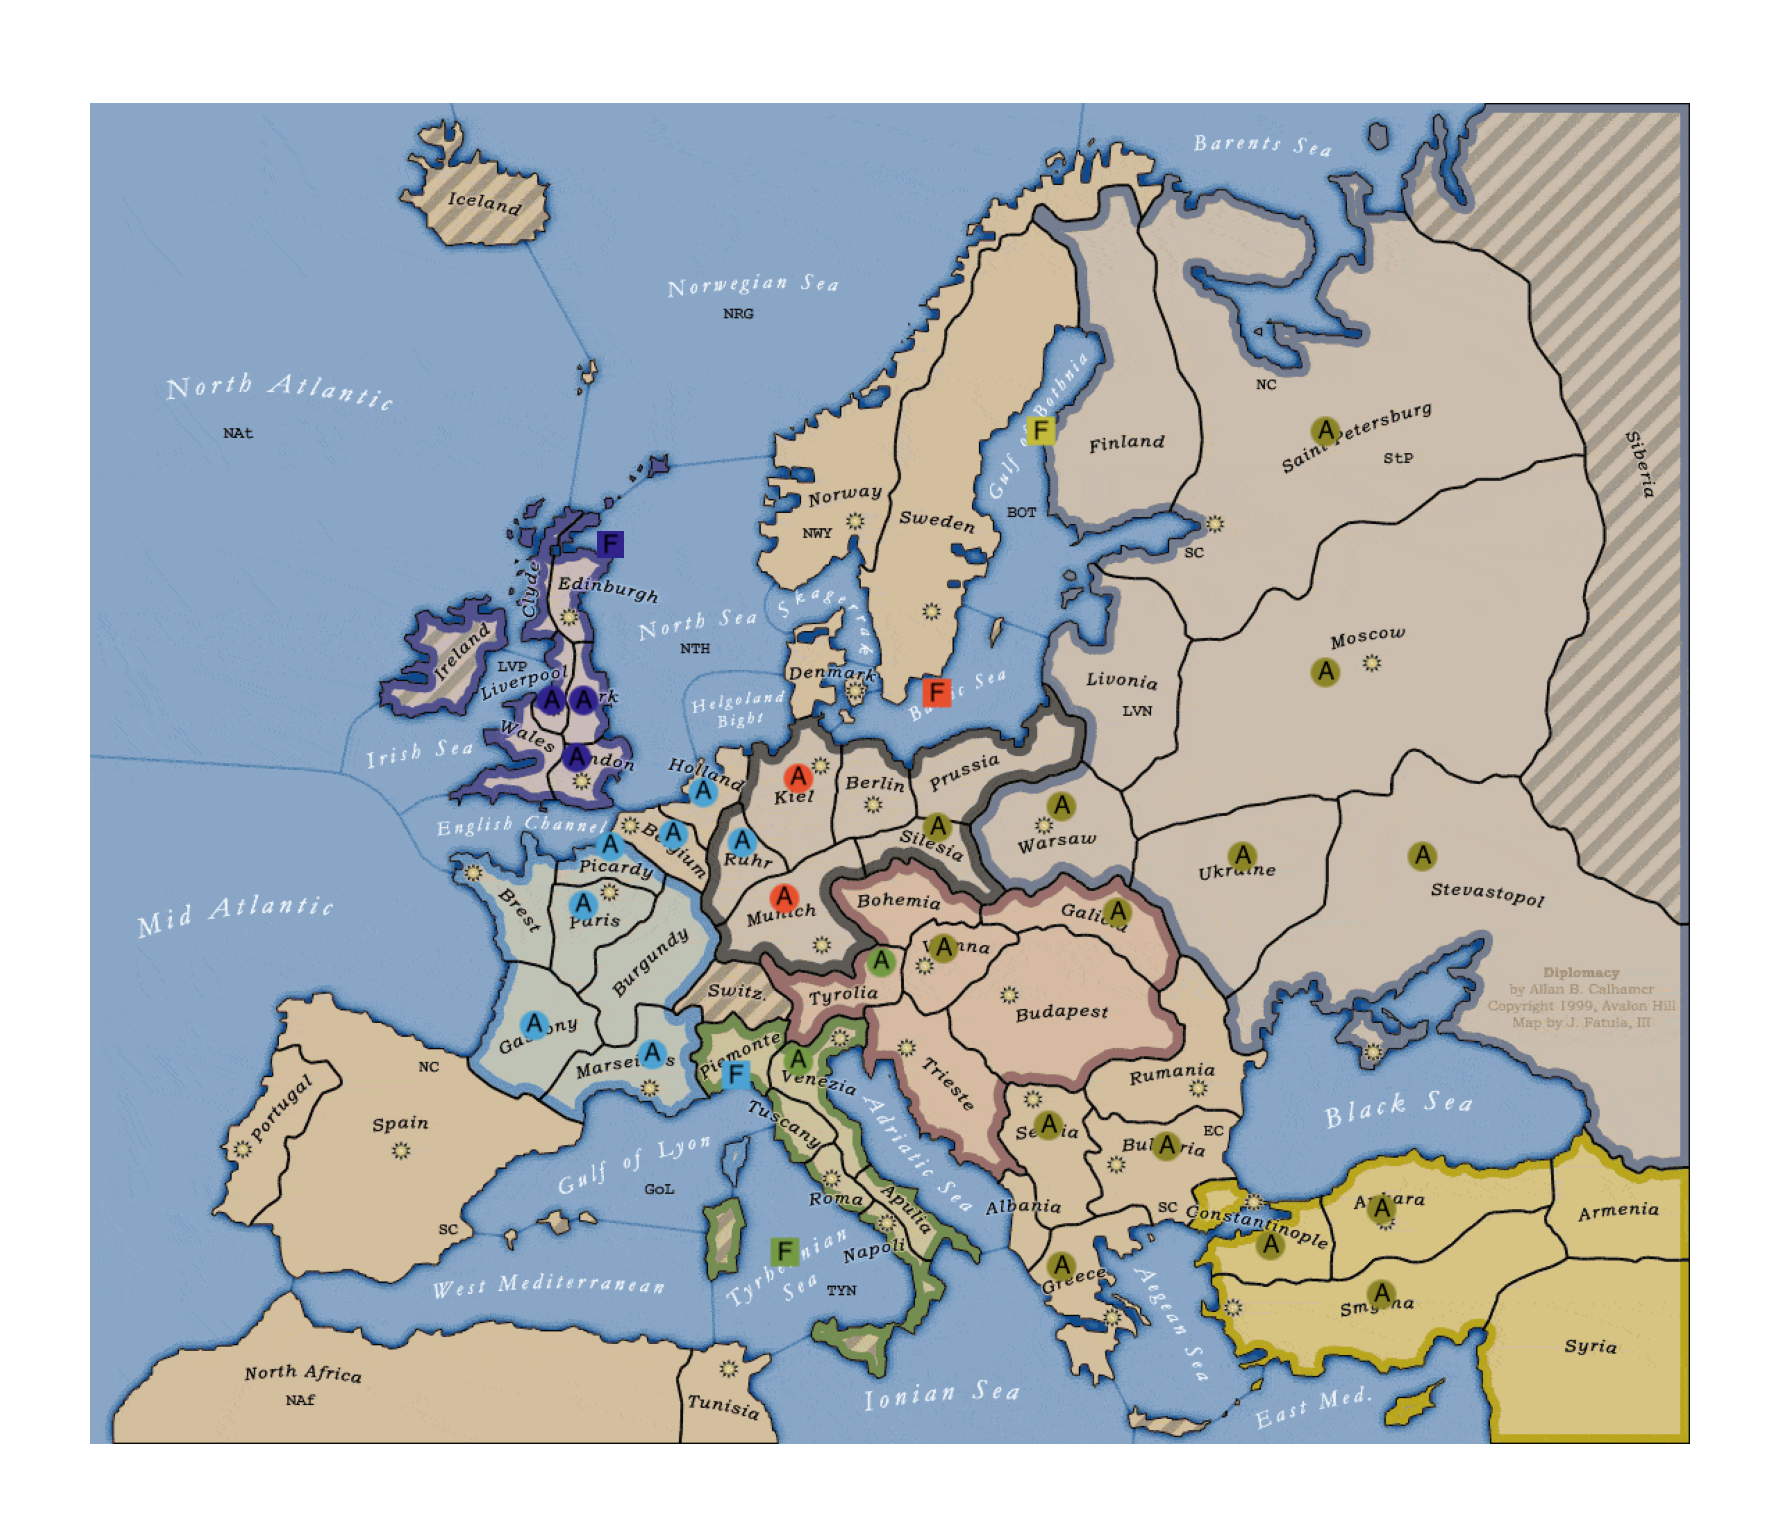

In [32]:
render_map()

determine minimum amount of force to capture/defend territory, assign best suited units to meet that, if remaining units have them defend vacated supply centers (that becomes new target territory), if none then backfill. ideally this won't happen and dependent moves will still have different target territories specifically suited to bolster other moves
^^ support can be cut and calculating possiblity of cutting support will be hard and shouldn't be an issue when model trained so just assign everyone to support that can

will need to rework rewards for moves, since a move could be "successful" in the sense that a unit executed an order that was towards the target territory but left the country in a worse spot. The model should be penalized if an action in a worse outcome for the country. Additionally, moves should not be penalized if they did not occur as intended, since that may be a successful defense. Will likely need to overhaul reward system, but still keep sharing reward based on distance, since that should help reinforce cooperation of units

two parts of awarding rewards: Was the goal achieved and what was the cost. for the first, if didn't control territory do you now control it or are you closer to it. If you did control it, do you still control it. for the second, how much ground did you lose, ie, how many territories did you lose control of/gain control of (other than target territory) and are opponents closer to your supply centers (greater importance for home supply centers). These rewards should be evaluated on a per unit basis since that is how the predictions will be run.

what to do if target territory is impossible for unit to get to. for example a land unit trying to get to a sea territory, a sea unit trying to get to a land-locked territory, a territory in england trying to get to any mainland territory. If truly impossible, don't allow that as choice. Currently can't think of anything like that. If not possible for the unit, see if can facilitate others getting there (convoying unit, land unit moving so sea unit can move into territory and then into another sea territory). If technically possible but not currently possible (convoying unit, land unit moving so sea unit can move into territory and then into another sea territory), see if can retask other units to help (assuming they aren't already, if both sea and land units have the same territory as target, should select moves that coordinate capture of territory even if unit can't directly do it). In the scenario where there is no other units cooperating, check prob of necessary units for your target and if close enough to top prob retask to facilitate the move. If that happens, don't award rewards for retasked unit since not using the model outputs.

considerations for target territory:
- maintain occupancy
- move into territory
- prevent others from occupying
^^ honestly this is all moot for now, the model will only indicate which territory is most important, decisions on the moves will just be rules based with the intention of capturing or keeping the territory. Future models may incorporate this

if choice between moving or supporting another unit to move, first decide who is best to move (ratio of unallied units and allied units that can move into origin territory and how many other options do the units have, value losing ground over doing other things) then decide if support is necessary (number of unallied units that can move into destination territory). Also consider need to move, on top of home supply center and may have build coming up. 

if choice between move or convoy, would already have a target selected so would be decision between getting army in destination or moving yourself, first decide who is best to move (ratio of unallied units and allied units that can move into origin territory and how many other options do the units have, value losing ground over doing other things) 

if choice between move, support, and convoy first decide who is best to move (ratio of unallied units and allied units that can move into origin territory and how many other options do the units have, value losing ground over doing other things)

if deciding between two high prob (tied for top, for example, maybe implement thresholding later)...

if high prob far away and slightly lower prob close by how decide what to choose? Ths will be covered by exploitation/exploration balance. Get probs out of model, use similar logic to pick a territory to go after, then with that choose move that best fulfills that choice

If target is far away choose move that is along path with shortest distance. Alternative s to choose move that goes to territory with highest connections for maximum future flexibility 

Need to consider all moves "simultaneously", this means that prediction is at the country level, not the unit level (this will probably be a pretty big change in predicting moves). Actually more nuanced than that since at some point there will be multiple "fronts" so choices are more local than global. Predict territory for each unit, then group units with same target together and resolve related orders simultaneously. Prediction stays at unit level. also implement methodology to determine most likely choice of all enemy units adjacent to grouped units and target territory, use that to help determine best move. for now would use simple logic.

Can also implement a similar logic to builds of what is the most valuable territory. List all possible builds and then select builds most advantageous to the top value territory

Will need to implement logic for deciding who to ally with. This may be complicated since will need to also add logic for when to stab someone

---

Only predict for 1 unit at time

Different NN for each spot on map <- easier input

OR 

Different NN for each country <- easier training
If this probably convolutional NN with 4 layers: Where is unit, where are allies, where are enemies, where is open
1-d array? or research how to have graph as input to NN?
revised: layers = controlled SCs, enemy SCs, allied units, enemy units. if predicting for one unit at time additioiinal layer of active unit

How to determine list of possible moves? 
list all possible moves from location, run each through `check order` -- checkmark
select move from that list -- checkmark

If predict one unit at time then how will scoring work? also how will penalties for unaligned moves be attributed? May have to instead to 3 layers: Where are allies, where are enemies, where is open
Then predict moves for all at same time
How then give list of possible moves to all units simultaneously?
Not sure but I think that is what needs to happen

First make it so that comp can run through this without human intervention -- checkmark
next need to implement notion of years -- checkmark
then need to implement builds -- checkmark

check rules function: can't dislodge yourself, can't retreat to a country where units bounced -- checkmark

Resolved how to resolve simultaneously and NN for moves decision: One NN for moves, then another for builds. Predictions/Gradients/Rewards for all moves in round are stored in list, aggregated for all moves associated for given unit, discounted rewards applied for all moves associated with unit, rewards applied to gradients from each move, gradients stored for all moves over given number of rounds (currently) after which gradients are aggregated and applied to model. Everything happens without "seeing" each other, so essentially simultaneously, then aggregated over window and applied to model.

Model currently only predicts best move, not best destination, move to support/convoy, etc. Builds are not observed by a model. Will revise in future.

NN is using same values from Hands On ML example, will revise in future.

Next up test multiple games with same model and look at number of rounds. Ideally would see decrease in number of rounds over multiple games (start with 3 games) -- checkmark, honestly surprisingly few bugs and went well

After that implement NN for builds. -- checkmark. I think need to tweak. to really see improvements

After that share portion of rewards with nearby allies by graph distance. Amount of reward decays steeply over distance. -- checkmark

NOTE: The previous two changes have made games take much longer, even longer than just random choices. Can't tell if all countries are making good choices or bad choices. To test, integrate ability to toggle use of RL for moves and builds and updating gradients as well as ability to apply models to only on country. This will allow to test trained model against random choices, a better evaluation of how the model has done -- checkmark

After that implement more complex outputs for moves. Specifically focus on only predicting moves that are possible AND/OR improve probability  of support/convoy. Possible approach: Add additional array to model input that is the proportion of available move types out of all possible moves of that type. For example, if can support 20 units if units were in appropriate countries, but only 2 are actually available, then the value in the input array corresponding to support would be 2/20 = 0.1. Support would group together supporting hold and move, move would group adjacent moves and convoy moves, hold would always be 1 since always a possible option, convoy would almost always be 0 since the opportunity wouldn't present itself that often -- not doing

Alternative: make two move models, one for units in land territory and one for units in sea territories, then remove penalty for moves since any selected move will be valid and regular penalties will suffice. For builds use number of available fleet build territories as modifier for fleet build prob output from model such that if there are no fleet build territories available it is impossible to return fleet. Would still reward a bad prediction but in that unit organization the prediction is irrelevant. For all models add another input array for unit type (just 1 for army, 0 for fleet, and 0 for empty since open array will inform if 0 means fleet or open) -- checkmark

check gradients to see if they are vanishing or exploding (I think vanishing)

reorganize to only apply gradients after finish a game (add back big reward for winning) -- checkmark

revise reward scheme -- checkmarkish

add moving probability for land and sea moves, similar too builds, based on number of possible moves for each category

"The other ingredient of note present in (2
) is the subtraction of h(t)⎯⎯⎯⎯⎯⎯⎯⎯⎯
. This is the expected rewards that a random network would obtain. By pulling this out, we only reward our network if it is outperforming random choices — this results in a net speed-up of the learning process."
https://www.efavdb.com/battleship

apply random and model decision, calc reward for random and model and subtract model rewards from random rewards to arrive at final rewards for move to ensure only favoring moves that are better than random

pull moves from past games, randomly select a state and country for computer to control, use to train/evaluate model against human moves

test different optimizers with different hyperparameters

Maybe instead of having one country be the only one using the model instead of one country doing random and see how long until they are eliminated

After that add regularization approaches to model (batch normalization, dropout, though apparently those aren't used in RL, which makes sense. Research more)

Determine target territoriy (to capture or defend) and revise rewards based on success of that intent. Will need to create moves list based around that intent. This is intriguing and most likely will yield better coordinated moves (beyond sharing rewards), but first exhaust infrastructure around selecting moves rather than destinations

explore possibility or transferring weights between identical configurations. This sounds like Q-learning, but instead of using the entire board as the as the state instead define the state as only the local interactions, the state may be replicated in different parts of the map and so learning can be transferred and sped up. Whenever move into deep-q explore this

After that add more dynamic prediction outputs rather than just type of move. Most likely this will be easier after implementing destination methodology for move selection but not dependent on it so can still develop independently. May need to research how to implement NN with variable size outputs.

Lessons learned about NNs/RL:
- When using Gradient Tape everything needs to happen within the `with` statement
- When using Gradient Tape only call the model, don't call predict. Tape doesn't automatically see predict, would need to manually add to watch, seems like an unnecessary step
- Don't allow impossible outputs from model and add tooling to accomodate for that, instead make multiple models tuned for different scenarios (sea vs land moves for convoy)

---

# Broken or needs work

- fix/double check `dist_target` calculation
- convoy
- builds
- colored icons